In [92]:
from google.colab import files
uploaded = files.upload()


Saving Clustering Clean Ads_Data.xlsx to Clustering Clean Ads_Data.xlsx


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [94]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Clustering Clean Ads_Data.xlsx']))
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0              323       1   0.00  0.35   0.0000  0.0031  0.0  0.0  
1              285       1   0.00  0.35   0.0000  0.0035  0.0  0.0  
2              355       1   0.00  0.35   0.0000  0.0028  0.0  0.0  
3              495       1   0.00  0.35   0.0000  0.0020  0.0  0.0  
4              242       1   0.00  0.35   0.0000  0.0041  0.0  0.0  
...            ...     ...    ...   ...      ...     ...  ...  ...  
23061            1       1   0.07  0.35   0.0455     NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260     NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325     NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455     NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585     NaN  NaN  NaN  

[23066 rows x 19 columns]

In [ ]:
df.shape

(23066, 19)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [96]:
df.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
round(((4736/23066)*100),2) # percentage of null values in CTR, CPM and CPC columns

20.53

In [ ]:
df['CTR'] = df['CTR'].fillna((df['Clicks']/df['Impressions'])*100)
df['CPM'] = df['CPM'].fillna((df['Spend']/df['Impressions'])*1000)
df['CPC'] = df['CPC'].fillna(df['Spend']/df['Clicks'])

In [ ]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

**Univariate Analysis**

In [ ]:
df_cat = df.select_dtypes('object')
df_cat.head()

Timestamp InventoryType   Ad Type Platform Device Type   Format
0  2020-9-2-17       Format1  Inter222    Video     Desktop  Display
1  2020-9-2-10       Format1  Inter227      App      Mobile    Video
2  2020-9-1-22       Format1  Inter222    Video     Desktop  Display
3  2020-9-3-20       Format1  Inter228    Video      Mobile    Video
4  2020-9-4-15       Format1  Inter217      Web     Desktop    Video

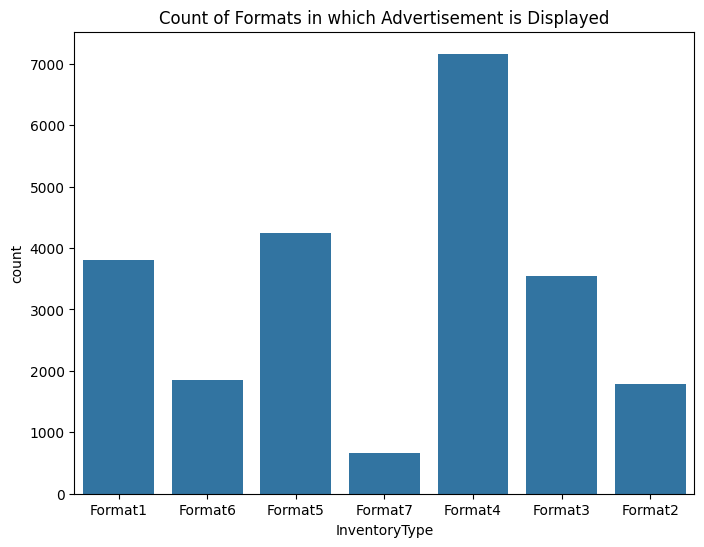

In [97]:
plt.figure(figsize=(8,6))
plt.title('Count of Formats in which Advertisement is Displayed')
sns.countplot(x='InventoryType', data= df)
plt.show();

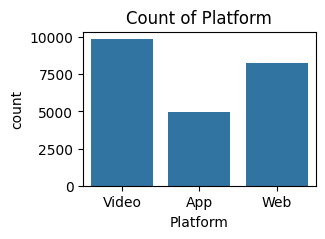

In [99]:
plt.figure(figsize=(3,2))
plt.title('Count of Platform')
sns.countplot(x='Platform', data= df)
plt.show();

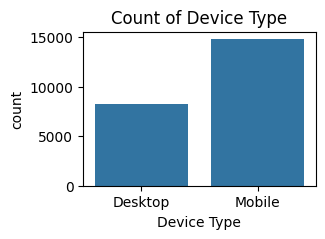

In [100]:
plt.figure(figsize=(3,2))
plt.title('Count of Device Type')
sns.countplot(x='Device Type', data= df)
plt.show();

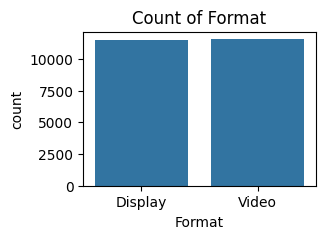

In [103]:
plt.figure(figsize=(3,2))
plt.title('Count of Format')
sns.countplot(x='Format', data= df)
plt.show();

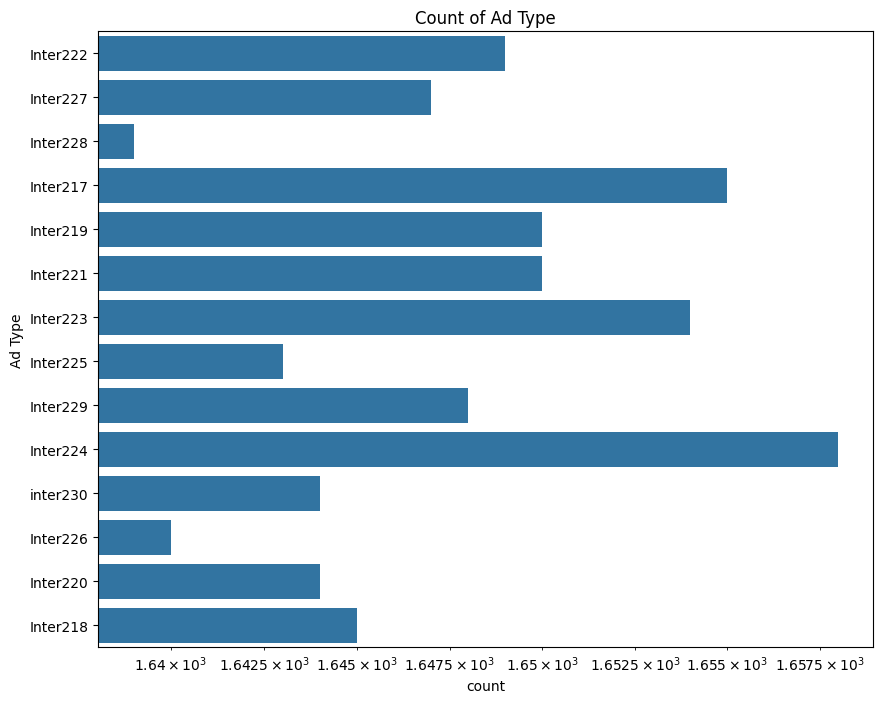

In [104]:
plt.figure(figsize=(10,8))
plt.title('Count of Ad Type')
sns.countplot(y='Ad Type', data= df)
plt.xscale('log')
plt.show();

In [106]:
df_num = df.select_dtypes(['float64', 'int64'])
df_num

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
0              300        250    75000                   1806   
1              300        250    75000                   1780   
2              300        250    75000                   2727   
3              300        250    75000                   2430   
4              300        250    75000                   1218   
...            ...        ...      ...                    ...   
23061          720        300   216000                      1   
23062          720        300   216000                      3   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue     CTR  \
0                  325          323       1   0.00  0.35   0.0000  0.0031   
1                  285          285       1   0.00  0.35   0.0000  0.0035   
2                  356          355       1   0.00  0.35   0.0000  0.0028   
3                  497          495       1   0.00  0.35   0.0000  0.0020   
4                  242          242       1   0.00  0.35   0.0000  0.0041   
...                ...          ...     ...    ...   ...      ...     ...   
23061                1            1       1   0.07  0.35   0.0455     NaN   
23062                2            2       1   0.04  0.35   0.0260     NaN   
23063                1            1       1   0.05  0.35   0.0325     NaN   
23064                1            1       1   0.07  0.35   0.0455     NaN   
23065                2            2       1   0.09  0.35   0.0585     NaN   

       CPM  CPC  
0      0.0  0.0  
1      0.0  0.0  
2      0.0  0.0  
3      0.0  0.0  
4      0.0  0.0  
...    ...  ...  
23061  NaN  NaN  
23062  NaN  NaN  
23063  NaN  NaN  
23064  NaN  NaN  
23065  NaN  NaN  

[23066 rows x 13 columns]

In [ ]:
df_num.shape

(23066, 13)

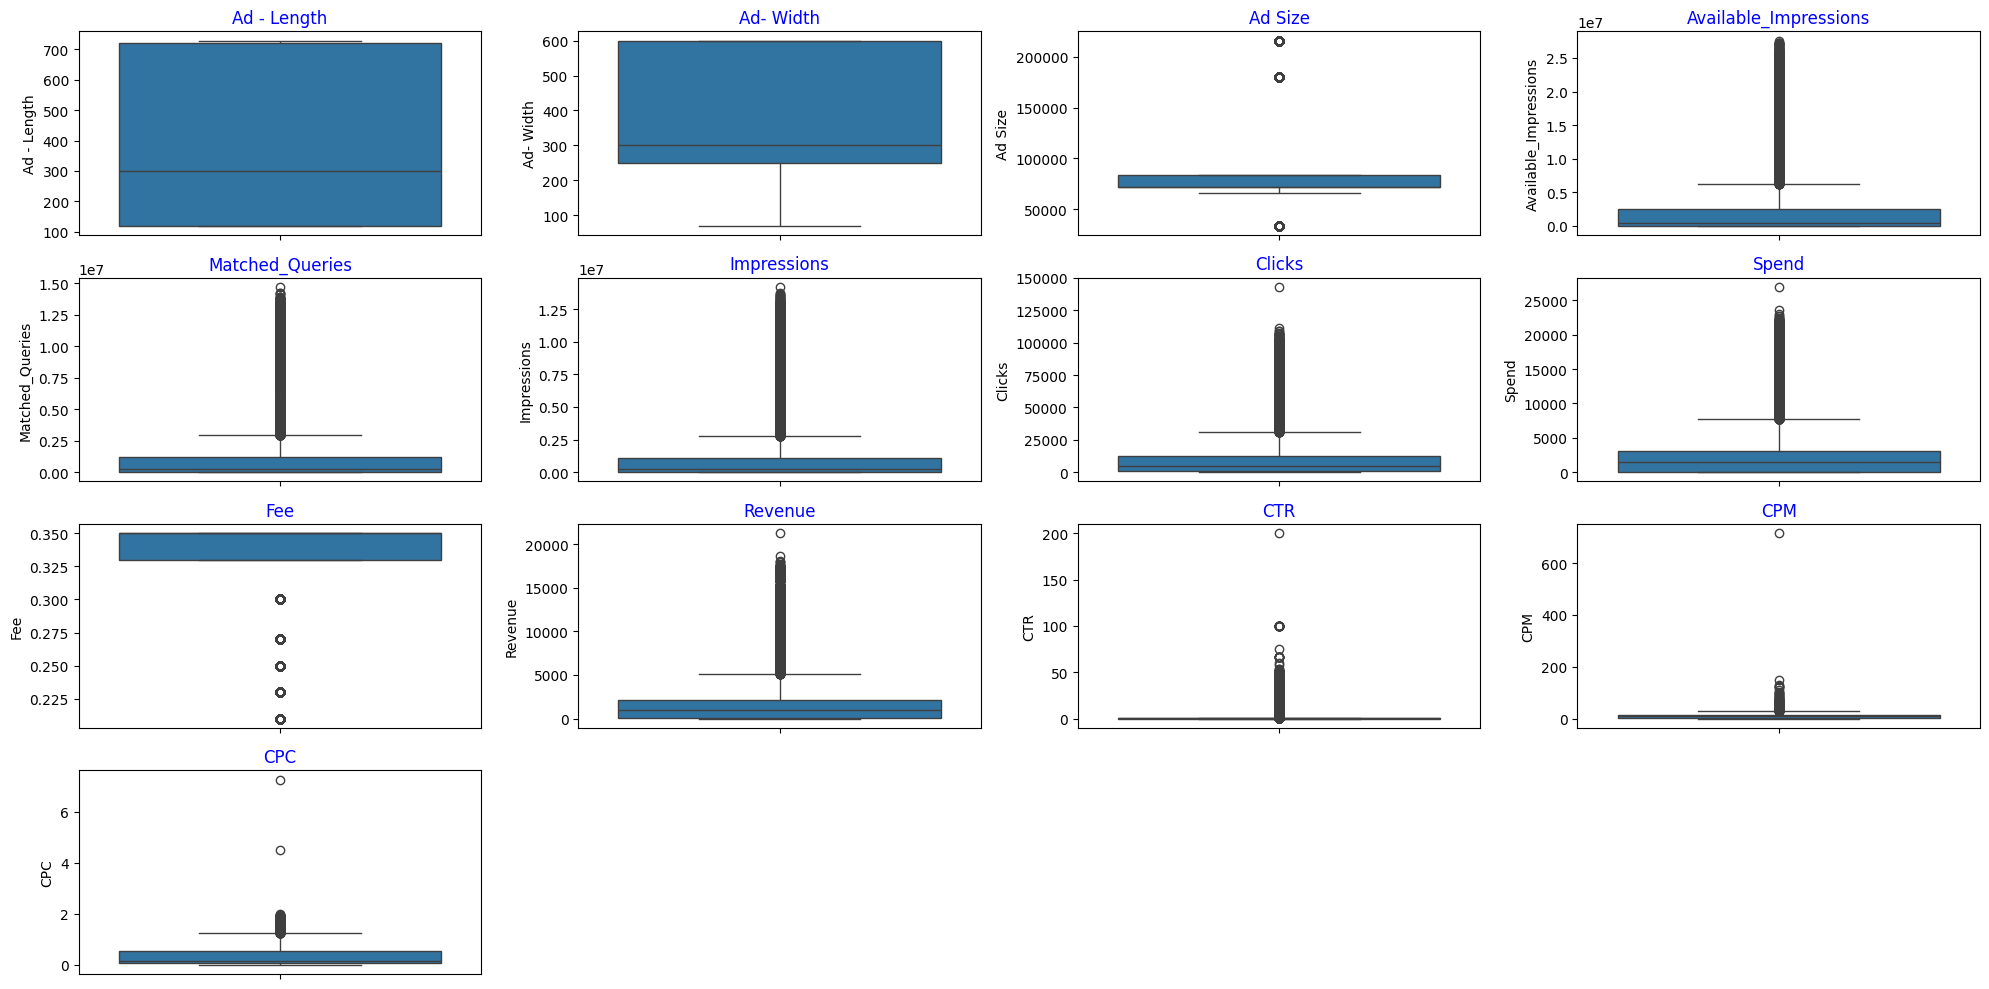

In [ ]:
fig = plt.figure(figsize=(20,10))
for i in range(0, len(df_num.columns)):
    ax= fig.add_subplot(4,4,i+1)
    sns.boxplot(df_num[df_num.columns[i]])
    ax.set_title(df_num.columns[i], color='Blue')
    plt.tight_layout();

**Bivariate Analysis**

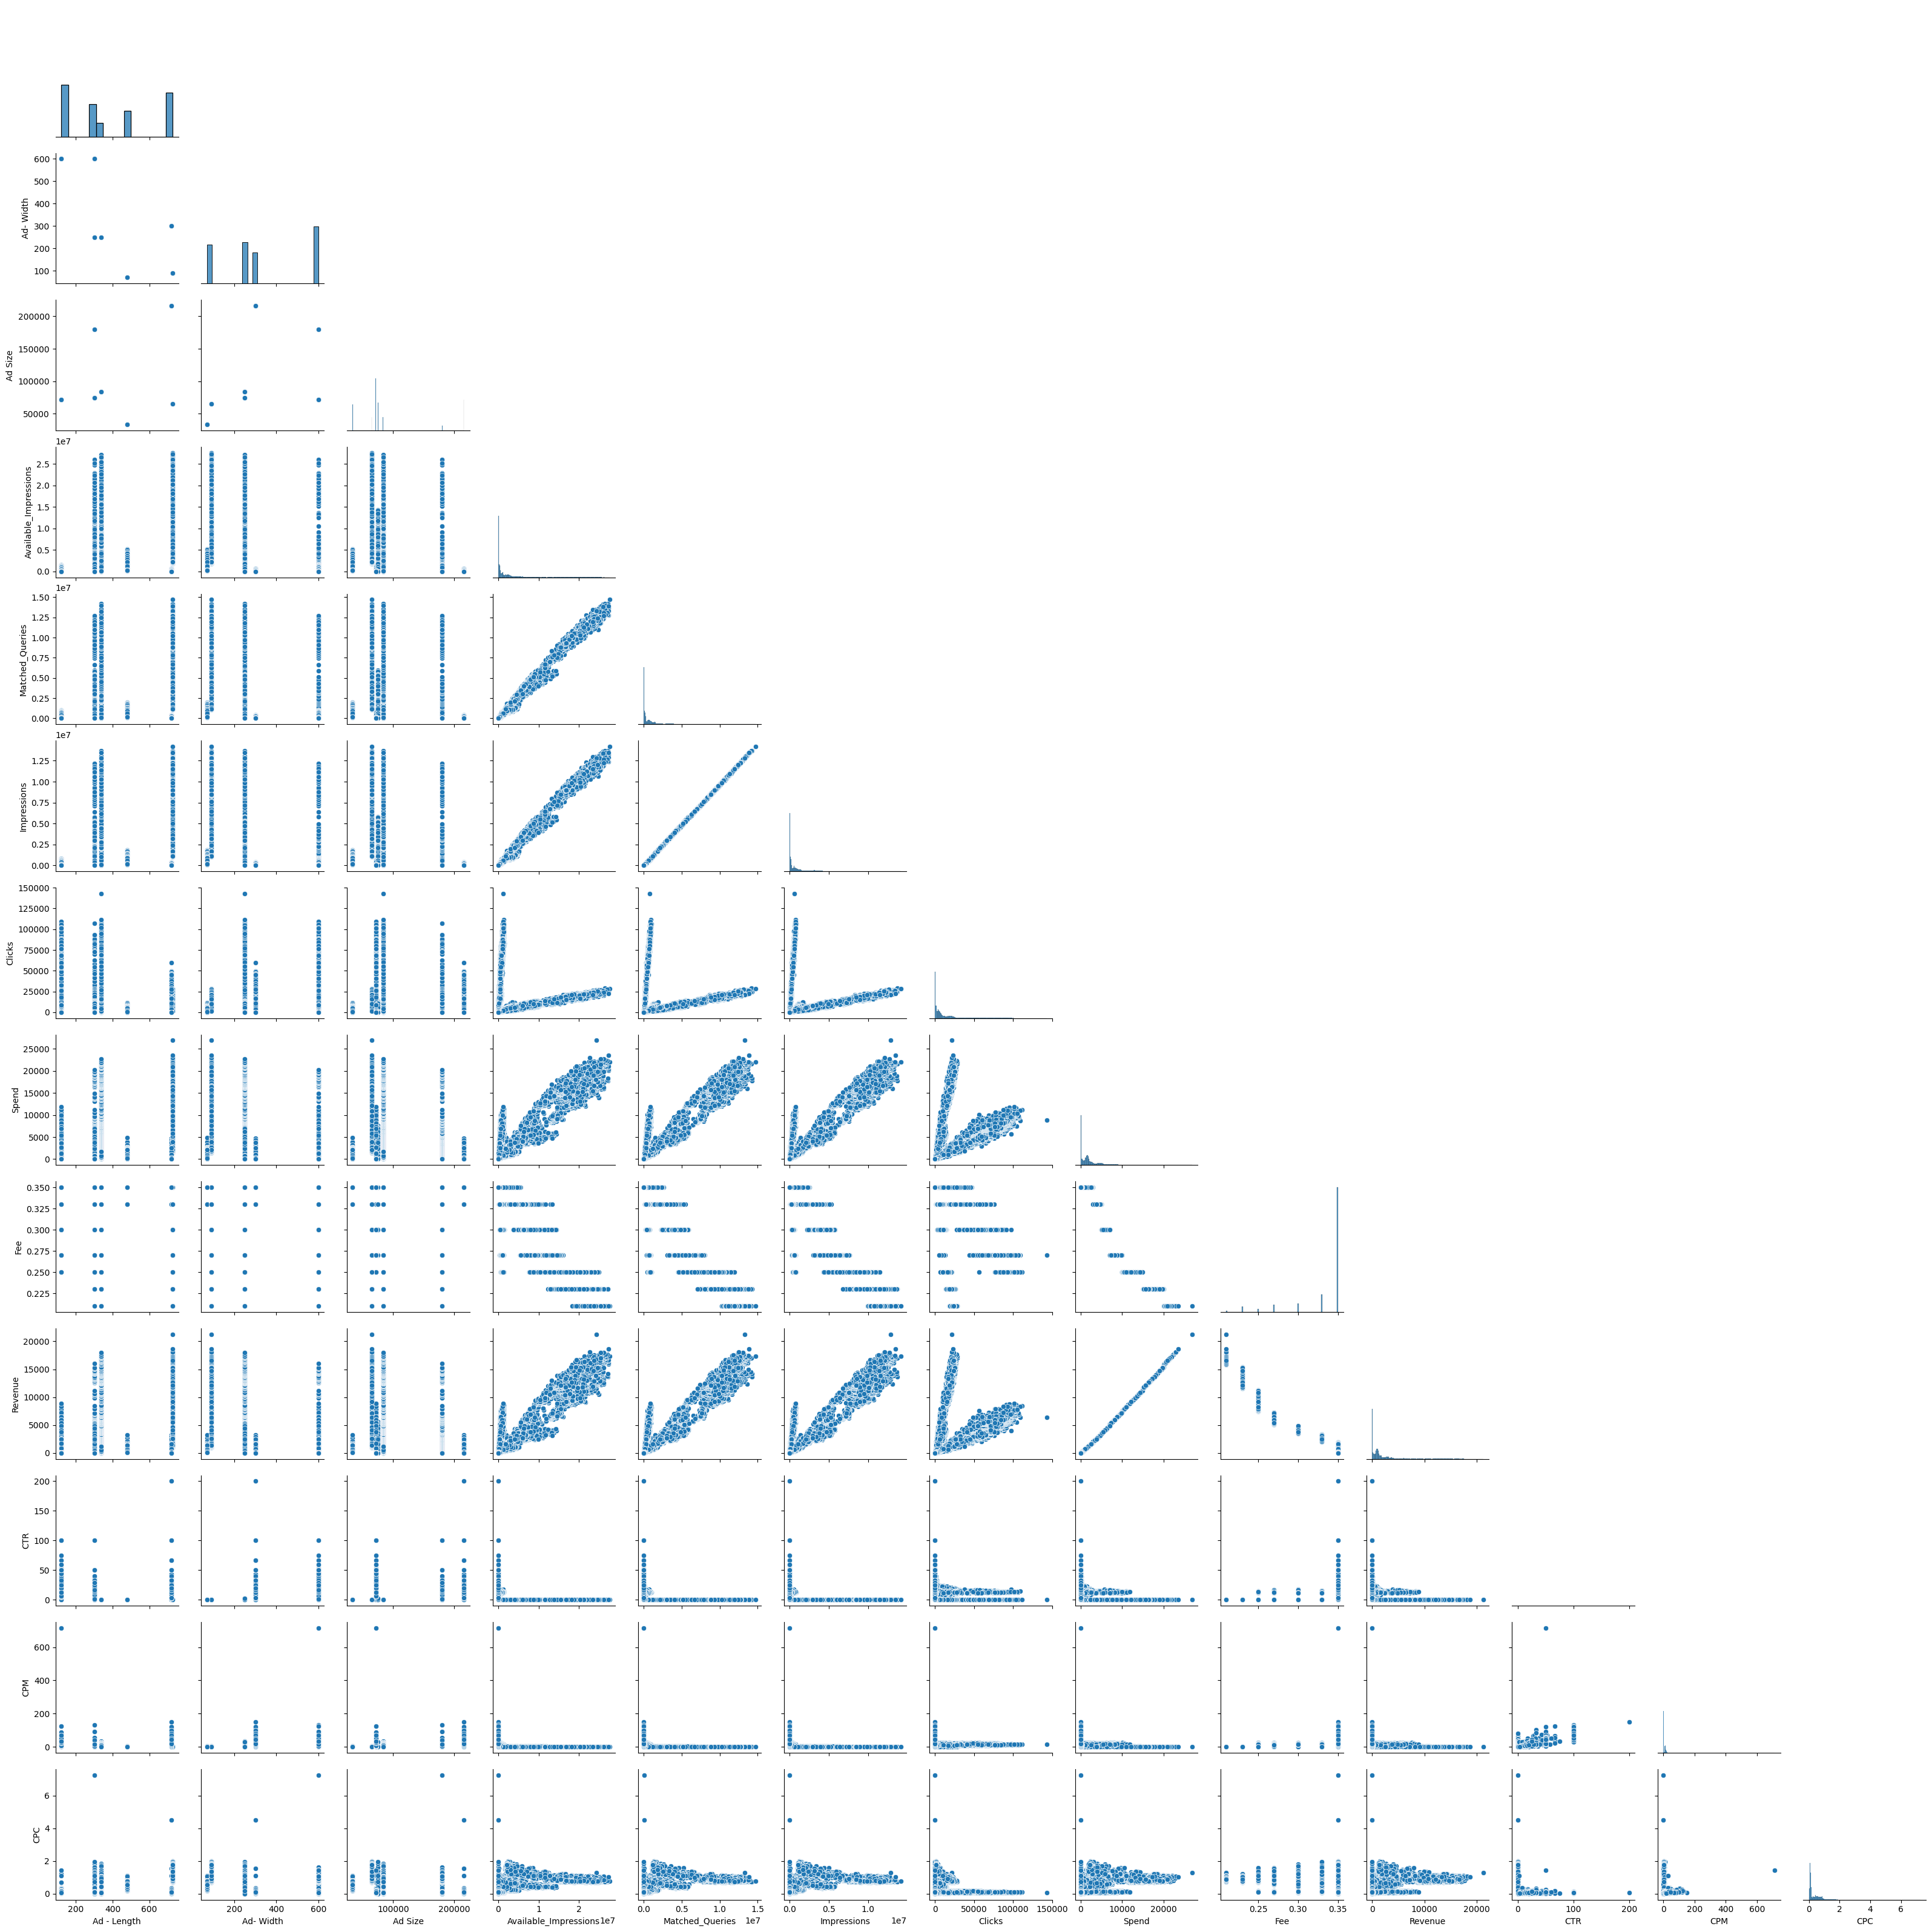

In [ ]:
sns.pairplot(df_num, corner=True)
plt.show()

In [ ]:
corr = df_num.corr()
round(corr, 2)

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
Ad - Length                   1.00      -0.71     0.54                   0.30   
Ad- Width                    -0.71       1.00     0.11                  -0.41   
Ad Size                       0.54       0.11     1.00                  -0.20   
Available_Impressions         0.30      -0.41    -0.20                   1.00   
Matched_Queries               0.30      -0.40    -0.20                   0.99   
Impressions                   0.29      -0.40    -0.20                   0.99   
Clicks                       -0.01       0.16     0.12                   0.11   
Spend                         0.25      -0.27    -0.14                   0.89   
Fee                          -0.14       0.15     0.17                  -0.81   
Revenue                       0.25      -0.26    -0.14                   0.90   
CTR                          -0.07       0.25     0.15                  -0.16   
CPM                          -0.23       0.55     0.25                  -0.35   
CPC                           0.25      -0.55    -0.34                   0.56   

                       Matched_Queries  Impressions  Clicks  Spend   Fee  \
Ad - Length                       0.30         0.29   -0.01   0.25 -0.14   
Ad- Width                        -0.40        -0.40    0.16  -0.27  0.15   
Ad Size                          -0.20        -0.20    0.12  -0.14  0.17   
Available_Impressions             0.99         0.99    0.11   0.89 -0.81   
Matched_Queries                   1.00         1.00    0.12   0.90 -0.83   
Impressions                       1.00         1.00    0.11   0.90 -0.83   
Clicks                            0.12         0.11    1.00   0.48 -0.53   
Spend                             0.90         0.90    0.48   1.00 -0.96   
Fee                              -0.83        -0.83   -0.53  -0.96  1.00   
Revenue                           0.91         0.90    0.47   1.00 -0.96   
CTR                              -0.16        -0.16   -0.08  -0.16  0.11   
CPM                              -0.35        -0.35    0.13  -0.23  0.15   
CPC                               0.58         0.58   -0.15   0.48 -0.40   

                       Revenue   CTR   CPM   CPC  
Ad - Length               0.25 -0.07 -0.23  0.25  
Ad- Width                -0.26  0.25  0.55 -0.55  
Ad Size                  -0.14  0.15  0.25 -0.34  
Available_Impressions     0.90 -0.16 -0.35  0.56  
Matched_Queries           0.91 -0.16 -0.35  0.58  
Impressions               0.90 -0.16 -0.35  0.58  
Clicks                    0.47 -0.08  0.13 -0.15  
Spend                     1.00 -0.16 -0.23  0.48  
Fee                      -0.96  0.11  0.15 -0.40  
Revenue                   1.00 -0.15 -0.22  0.47  
CTR                      -0.15  1.00  0.48 -0.24  
CPM                      -0.22  0.48  1.00 -0.48  
CPC                       0.47 -0.24 -0.48  1.00

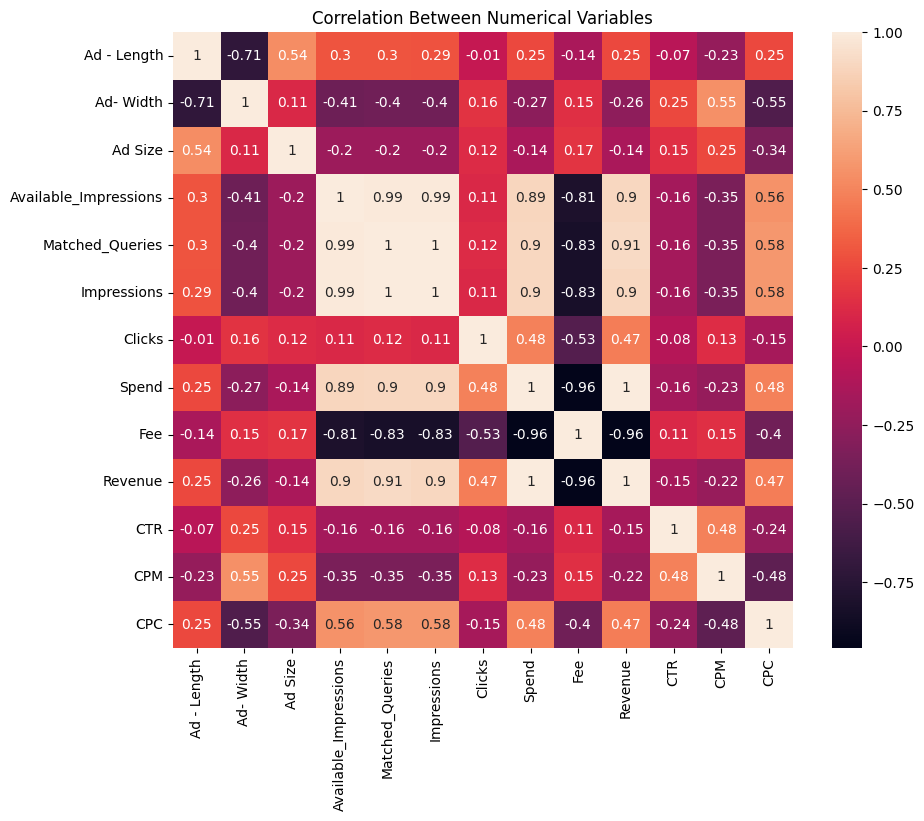

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(round(corr,2), annot=True)
plt.title('Correlation Between Numerical Variables')
plt.show();

**Outlier Treatment**

In [112]:
def treat_outlier(x):
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    IQR=q75-q25
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [113]:
no_outlier = ['Ad - Length', 'Ad- Width']

In [114]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [115]:
for i in df_num[outlier_list]:
    df_num[i]=treat_outlier(df_num[i])

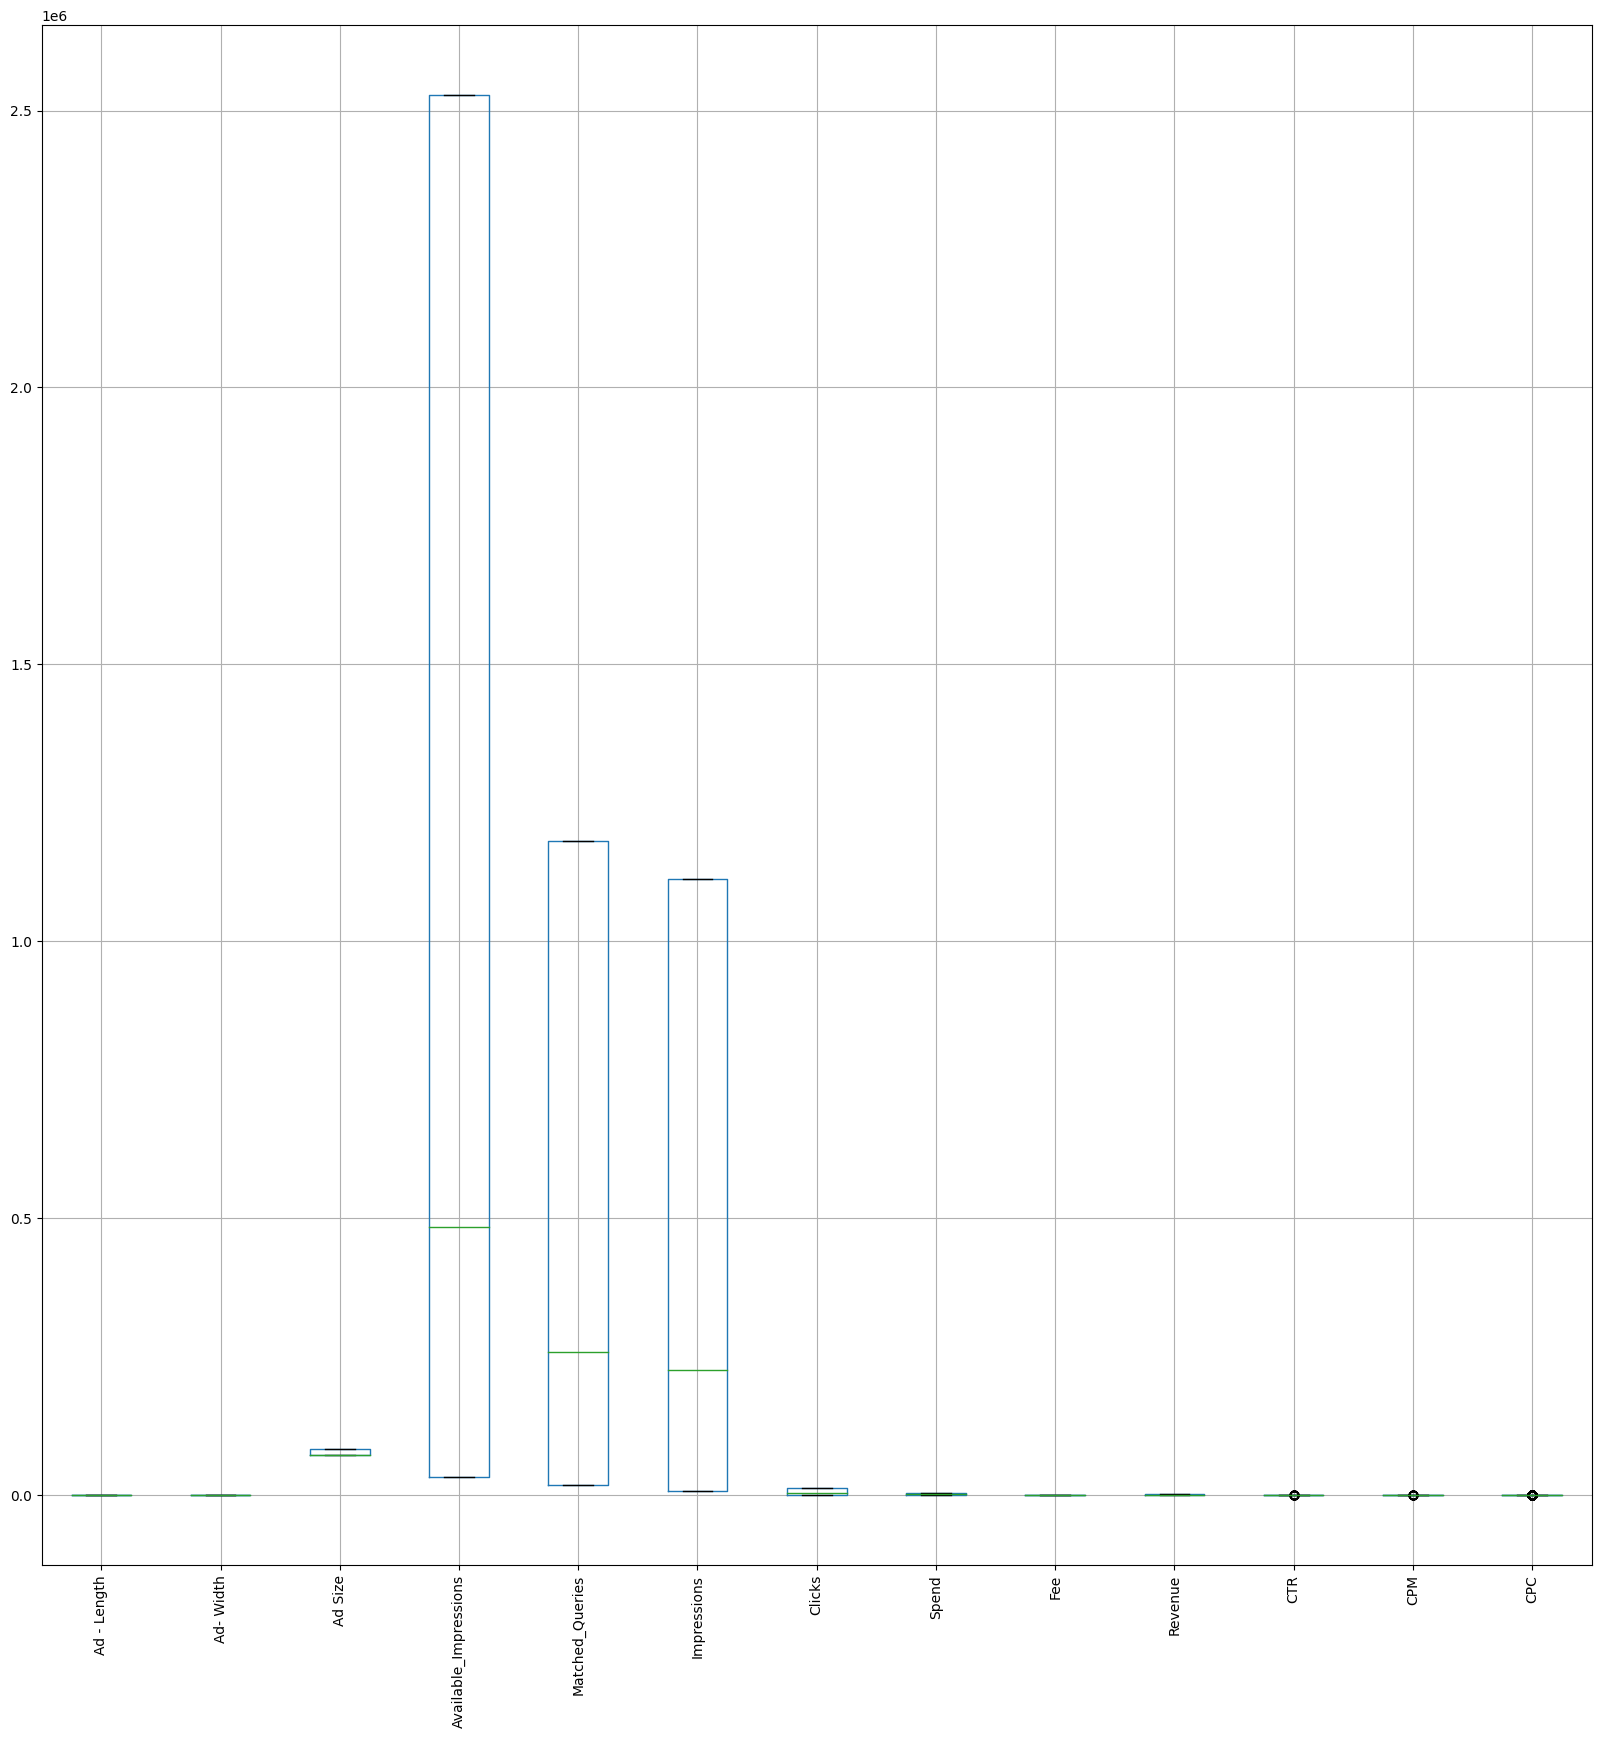

In [116]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

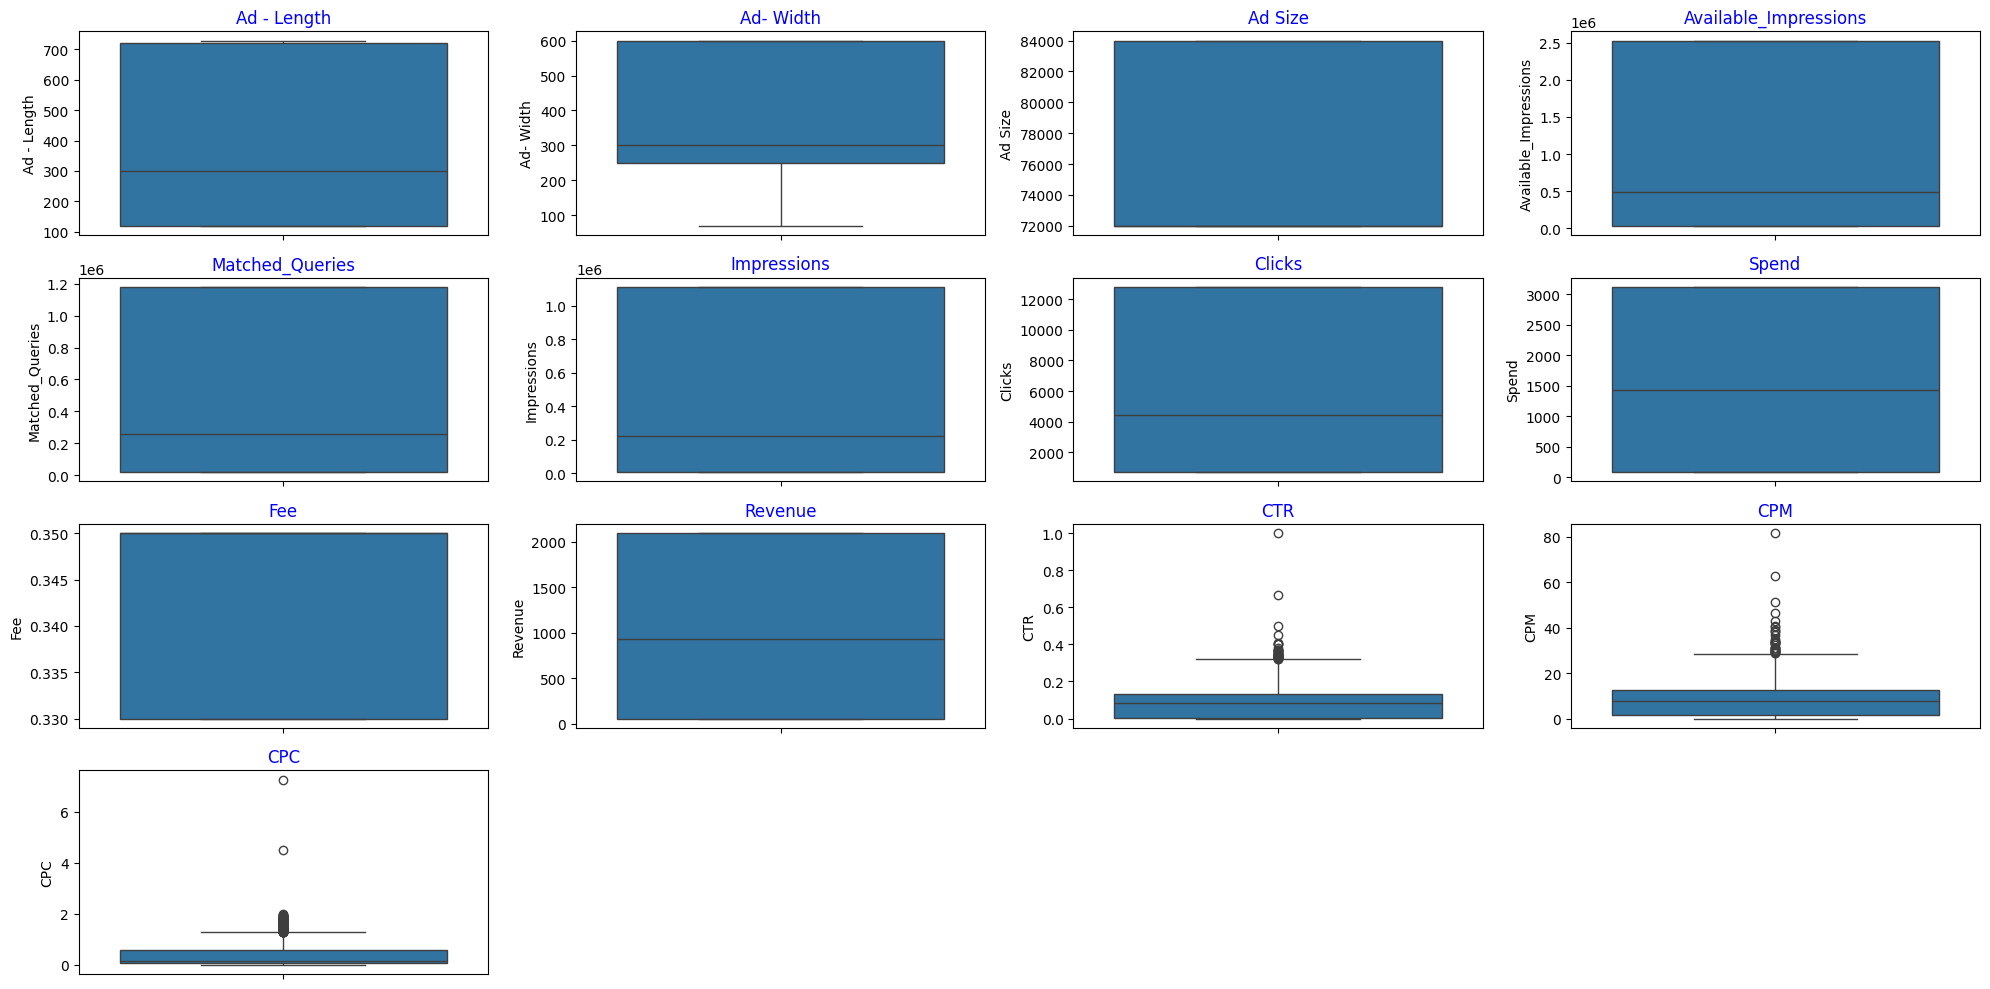

In [117]:
fig = plt.figure(figsize=(20,10))
for i in range(0, len(df_num.columns)):
    ax= fig.add_subplot(4,4,i+1)
    sns.boxplot(df_num[df_num.columns[i]])
    ax.set_title(df_num.columns[i], color='Blue')
    plt.tight_layout();

**Scaling the Data**

In [ ]:
from scipy.stats import zscore

In [ ]:
scaled_data = df_num.apply(zscore)

In [ ]:
scaled_data.head(5)

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.192668              -0.934925         -0.98599   
1    -0.364496  -0.432797 -0.192668              -0.934925         -0.98599   
2    -0.364496  -0.432797 -0.192668              -0.934925         -0.98599   
3    -0.364496  -0.432797 -0.192668              -0.934925         -0.98599   
4    -0.364496  -0.432797 -0.192668              -0.934925         -0.98599   

   Impressions    Clicks     Spend       Fee   Revenue       CTR       CPM  \
0    -0.978479 -1.043986 -1.156558  0.587931 -1.145389 -1.200938 -1.089678   
1    -0.978479 -1.043986 -1.156558  0.587931 -1.145389 -1.199606 -1.089678   
2    -0.978479 -1.043986 -1.156558  0.587931 -1.145389 -1.200938 -1.089678   
3    -0.978479 -1.043986 -1.156558  0.587931 -1.145389 -1.200938 -1.089678   
4    -0.978479 -1.043986 -1.156558  0.587931 -1.145389 -1.191614 -1.089678   

      CPC  
0 -0.9113  
1 -0.9113  
2 -0.9113  
3 -0.9113  
4 -0.9113

**Constructing a Dendrogram**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
wardlink = linkage(scaled_data, method='ward', metric ='euclidean')

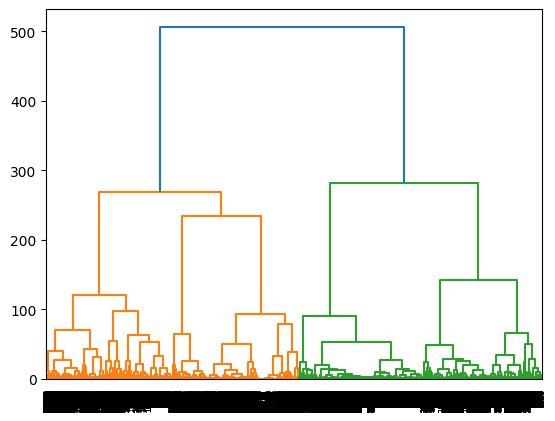

In [ ]:
dend = dendrogram(wardlink)

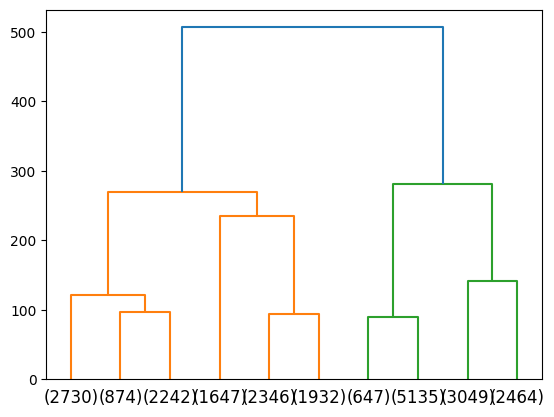

In [ ]:
dendro = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10
                 );

**K-means Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters =1, random_state = 1)
k_means.fit(scaled_data)
round(k_means.inertia_,2)

299858.0

In [ ]:
k_means = KMeans(n_clusters =2, random_state = 1)
k_means.fit(scaled_data)
round(k_means.inertia_,2)

165479.96

In [ ]:
k_means = KMeans(n_clusters =3, random_state = 1)
k_means.fit(scaled_data)
round(k_means.inertia_,2)

123736.72

In [ ]:
k_means = KMeans(n_clusters =4, random_state = 1)
k_means.fit(scaled_data)
round(k_means.inertia_,2)

93357.22

In [ ]:
k_means = KMeans(n_clusters =5, random_state = 1)
k_means.fit(scaled_data)
round(k_means.inertia_,2)

65751.6

In [ ]:
k_means = KMeans(n_clusters =6, random_state = 1)
k_means.fit(scaled_data)
round(k_means.inertia_,2)

55157.19

In [ ]:
k_means = KMeans(n_clusters =7, random_state = 1)
k_means.fit(scaled_data)
round(k_means.inertia_,2)

45551.94

**Elbow Plot**

In [ ]:
wss = []

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters =i, random_state=1)
    KM.fit(scaled_data)
    wss.append(round(KM.inertia_,2))

In [ ]:
wss

[299858.0,
 165479.96,
 123736.72,
 93357.22,
 65751.6,
 55157.19,
 45551.94,
 40440.42,
 37117.61,
 35112.26]

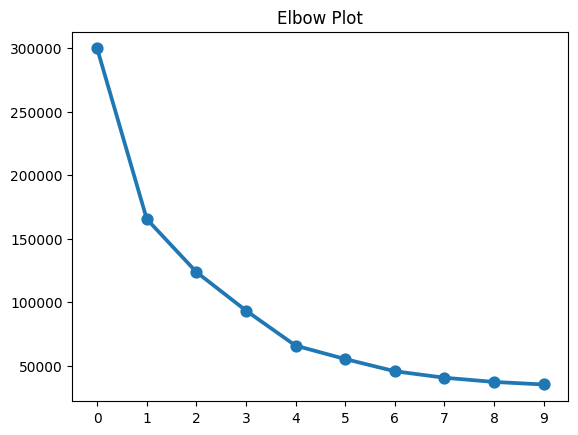

In [ ]:
sns.pointplot( wss)
plt.title('Elbow Plot')
plt.show;

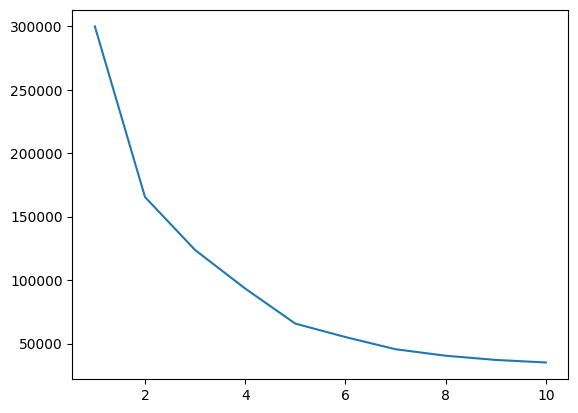

In [ ]:
plt.plot(range(1,11), wss);

**Silhouette Score**

**Silhouette Score with K-means = 3**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_data)
labels = k_means.labels_

In [ ]:
# Calculating silhouette_score
silhouette_score(scaled_data,labels,random_state=1)

0.4217293161712174

**Silhouette Score with K-means = 4**

In [ ]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_data)
labels = k_means.labels_

In [ ]:
silhouette_score(scaled_data,labels,random_state=1)

0.44561614570521746

**Silhouette Score with K-means = 5**

In [ ]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_data)
labels = k_means.labels_

In [ ]:
silhouette_score(scaled_data,labels,random_state=1)

0.5004668128097572

**Silhouette Score with K-means = 6**

In [ ]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_data)
labels = k_means.labels_

In [ ]:
silhouette_score(scaled_data,labels,random_state=1)

0.5004668128097572

**Silhouette Score with K-means = 7**

In [ ]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_data)
labels = k_means.labels_

In [ ]:
silhouette_score(scaled_data,labels,random_state=1)

0.5004668128097572

Since silhouette score for k-means = 5 is greater than k-means = 4, and also since, the silhouette scores for k-means = 6 and k-means =7 are the same as silhoeutte score of k-means = 5, we will take the final number of clusters as 5.

In [ ]:
df_num['Clus_means'] = labels
df_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250  75000.0               33672.25          18282.5   
1          300        250  75000.0               33672.25          18282.5   
2          300        250  75000.0               33672.25          18282.5   
3          300        250  75000.0               33672.25          18282.5   
4          300        250  75000.0               33672.25          18282.5   

   Impressions  Clicks  Spend   Fee    Revenue     CTR   CPM   CPC  Clus_means  
0       7990.5   710.0  85.18  0.35  55.365375  0.0034  1.75  0.09           1  
1       7990.5   710.0  85.18  0.35  55.365375  0.0035  1.75  0.09           1  
2       7990.5   710.0  85.18  0.35  55.365375  0.0034  1.75  0.09           1  
3       7990.5   710.0  85.18  0.35  55.365375  0.0034  1.75  0.09           1  
4       7990.5   710.0  85.18  0.35  55.365375  0.0041  1.75  0.09           1

**Silhouette Analysis**

In [ ]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:

    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_data)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_data,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4174565809886918
For n_clusters=3, the silhouette score is 0.4141149320082417
For n_clusters=4, the silhouette score is 0.44561614570521746
For n_clusters=5, the silhouette score is 0.5004668128097572
For n_clusters=6, the silhouette score is 0.4964916407834132
For n_clusters=7, the silhouette score is 0.5002818809148312
For n_clusters=8, the silhouette score is 0.49531938698785
For n_clusters=9, the silhouette score is 0.5103575927327262
For n_clusters=10, the silhouette score is 0.5280527596928045


**Cluster Profiling**

In [ ]:
df_num.Clus_means.value_counts().sort_index()

Clus_means
0    5807
1    5995
2    4282
3    5220
4    1762
Name: count, dtype: int64

In [ ]:
clust_profile=df_num

In [ ]:
clust_profile=df_num.groupby('Clus_means').mean()
clust_profile['freq']=df.Clus_means.value_counts().sort_index()
clust_profile

Ad - Length   Ad- Width       Ad Size  Available_Impressions  \
Clus_means                                                                 
0            430.698812  144.112278  74086.102979           1.681978e+06   
1            132.670559  586.747289  72503.919933           4.349669e+04   
2            457.791686  202.230266  74968.472676           2.526526e+06   
3            647.620690  299.204981  84000.000000           2.321325e+05   
4            140.124858  574.177072  73164.585698           7.292611e+05   

            Matched_Queries   Impressions        Clicks        Spend  \
Clus_means                                                             
0              8.046484e+05  7.615989e+05   3390.724298  1496.242025   
1              2.433710e+04  1.321951e+04   1556.350626   173.170974   
2              1.180612e+06  1.112347e+06   8915.523237  3119.545579   
3              1.269531e+05  1.060100e+05   8600.710297  1137.540257   
4              5.147493e+05  4.340356e+05  12788.822361  3028.614103   

                 Fee      Revenue       CTR        CPM       CPC  freq  
Clus_means                                                              
0           0.350000   972.557312  0.031833   1.965797  0.439511  5807  
1           0.350000   112.559863  0.144654  11.225295  0.113099  5995  
2           0.330019  2090.041521  0.030105   1.818765  0.537616  4282  
3           0.349628   740.554309  0.138127  10.892766  0.099150  5220  
4           0.332406  2023.507472  0.145453  12.609742  0.116608  1762

0 - highest matched queries, impressions, fee, 2nd highest CPC and highest CTR

1 - highest ad-width, fee and 2nd highest CPM, available impressions

2 - 2nd highest ad-length,clicks, spend, fee, cTR, highest CPC lowest ad-width

3 - highest ad-length, ad size,cpc 3rd highest clicks,CPM, 2nd highest fee,
  
4 - 2nd highest ad-width, highest available impressions, clicks, cpm 2nd highest macthed queriesimpressions, spend, revenue

In [ ]:
df['Clus_means'] = labels
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  Clus_means  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0           1  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0           1  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0           1  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0           1  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0           1

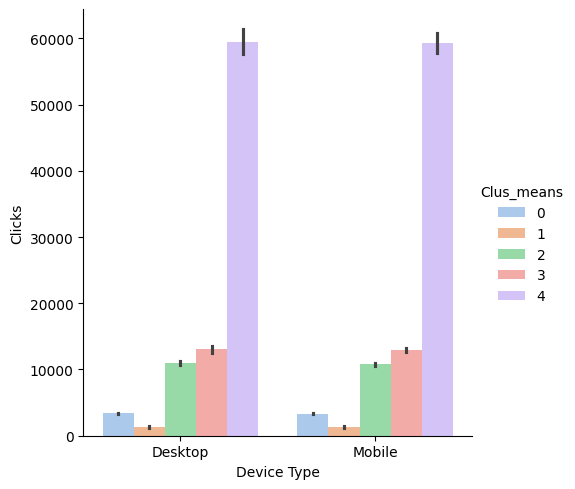

In [ ]:
sns.catplot(data = df, x='Device Type', y ='Clicks', hue='Clus_means', kind='bar', palette='pastel');

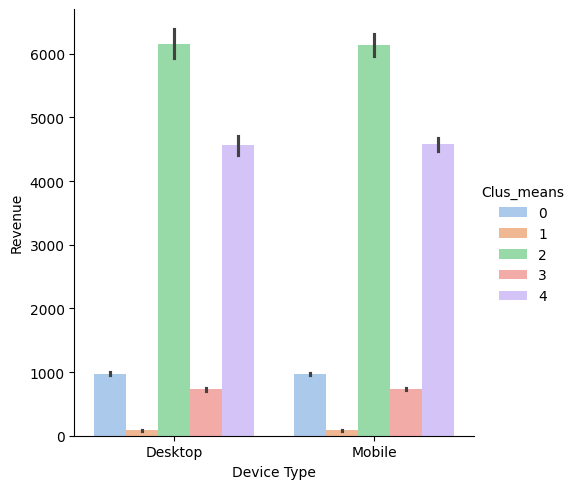

In [ ]:
sns.catplot(data = df, x='Device Type', y ='Revenue', hue='Clus_means', kind='bar', palette='pastel');

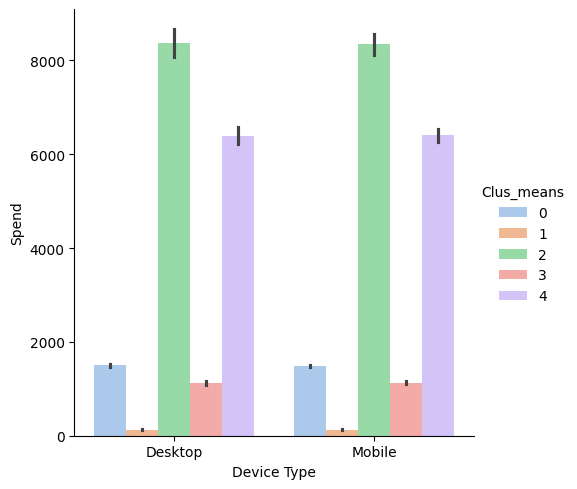

In [ ]:
sns.catplot(data = df, x='Device Type', y ='Spend', hue='Clus_means', kind='bar', palette='pastel');

# **PCA**

In [3]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=34abc58a52376d308b157104855f2c82459838e9c456095dae25e731d7566b35
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving PCA India Data_Census.xlsx to PCA India Data_Census.xlsx


In [6]:
import io
pc = pd.read_excel(io.BytesIO(uploaded['PCA India Data_Census.xlsx']))
pc.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [7]:
pc.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [8]:
pc.shape

(640, 61)

In [9]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

no data irregularirties.

In [119]:
pc.describe().T


count           mean            std         min  \
State Code               640.0      17.114062       9.426486    1.000000   
Dist.Code                640.0     320.500000     184.896367    1.000000   
No_HH                    640.0   51222.871875   48135.405475  350.000000   
TOT_M                    640.0   79940.576563   73384.511114  391.000000   
TOT_F                    640.0  122372.084375  113600.717282  698.000000   
...                        ...            ...            ...         ...   
NON_WORK_M               640.0     510.014063     610.603187    0.000000   
NON_WORK_F               640.0     704.778125     910.209225    5.000000   
Total Male Population    640.0   92249.675000   84395.070530  447.000000   
Total Female Population  640.0  134314.384375  123960.865240  754.000000   
Gender Ratio             640.0      68.964855       9.107841   46.311555   

                                  25%           50%            75%  \
State Code                   9.000000     18.000000      24.000000   
Dist.Code                  160.750000    320.500000     480.250000   
No_HH                    19484.000000  35837.000000   68892.000000   
TOT_M                    30228.000000  58339.000000  107918.500000   
TOT_F                    46517.750000  87724.500000  164251.750000   
...                               ...           ...            ...   
NON_WORK_M                 161.000000    326.000000     604.500000   
NON_WORK_F                 220.500000    464.500000     853.500000   
Total Male Population    35159.250000  67967.000000  124873.500000   
Total Female Population  51963.250000  96462.500000  181301.500000   
Gender Ratio                62.151322     68.893181      76.416851   

                                   max  
State Code                   35.000000  
Dist.Code                   640.000000  
No_HH                    310450.000000  
TOT_M                    485417.000000  
TOT_F                    750392.000000  
...                                ...  
NON_WORK_M                 6456.000000  
NON_WORK_F                10533.000000  
Total Male Population    574013.000000  
Total Female Population  834570.000000  
Gender Ratio                 89.685113  

[62 rows x 8 columns]

In [11]:
pc.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [12]:
pc.duplicated().sum()

0

Perform an EDA on the data to extract useful insights Note:

1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

2. Example questions to answer from EDA - (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?


**Chosen 5 variables: **

No_HH : No of Household

TOT_M : Total population Male

TOT_F : Total population Female

M_06 : Population in the age group 0-6 Male

F_06 : Population in the age group 0-6 Female





**Univariate Analysis**

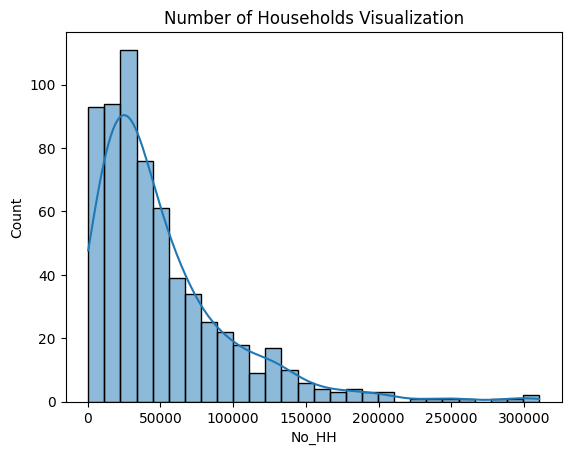

In [14]:
sns.histplot(data=pc, x='No_HH', kde=True)
plt.title('Number of Households Visualization')
plt.show();

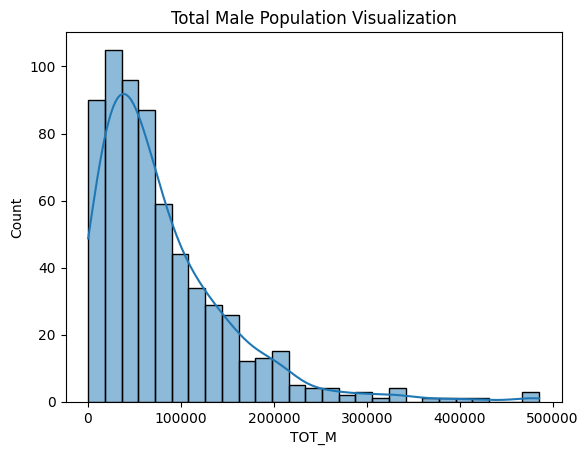

In [15]:
sns.histplot(data=pc, x='TOT_M', kde=True)
plt.title('Total Male Population Visualization')
plt.show();

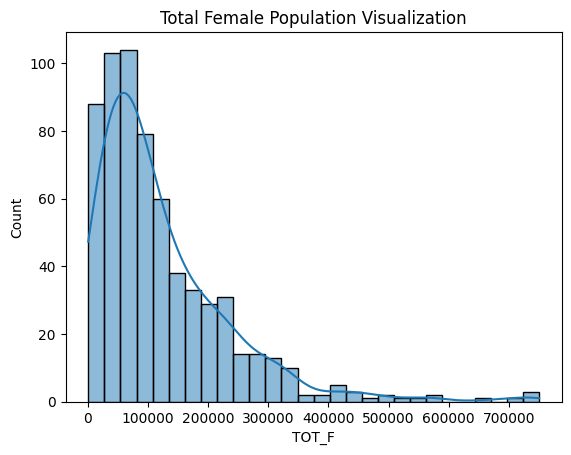

In [16]:
sns.histplot(data=pc, x='TOT_F', kde=True)
plt.title('Total Female Population Visualization')
plt.show();

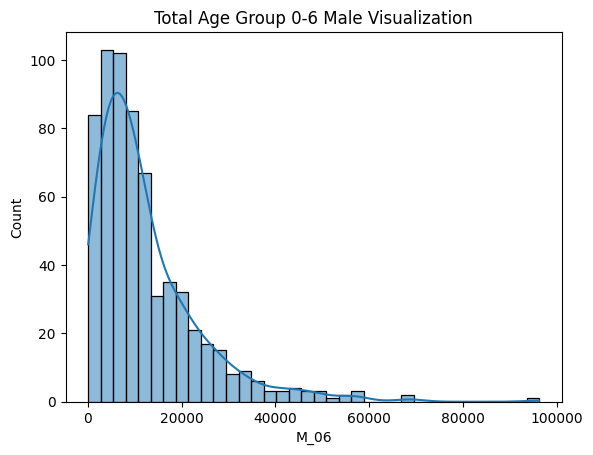

In [17]:
sns.histplot(data=pc, x='M_06', kde=True)
plt.title('Total Age Group 0-6 Male Visualization')
plt.show();

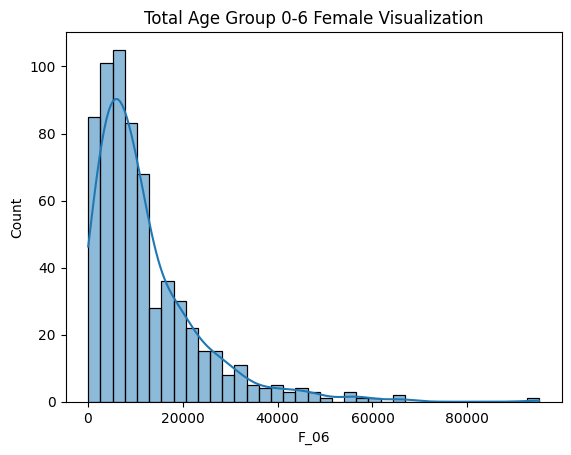

In [18]:
sns.histplot(data=pc, x='F_06', kde=True)
plt.title('Total Age Group 0-6 Female Visualization')
plt.show();

**Bivariate Analysis**

In [19]:
HH_per_state= pd.DataFrame(pc.groupby(['State'])['No_HH'].sum())
HH_per_state['State'] = HH_per_state.index
HH_per_state.reset_index(drop=True, inplace=True)
HH_per_state.sort_values('No_HH', ascending=False, inplace=True)
HH_per_state.head()

No_HH           State
32  4006871   Uttar Pradesh
19  3136214     Maharashtra
1   3127287  Andhra Pradesh
30  2964700      Tamil Nadu
34  2615284     West Bengal

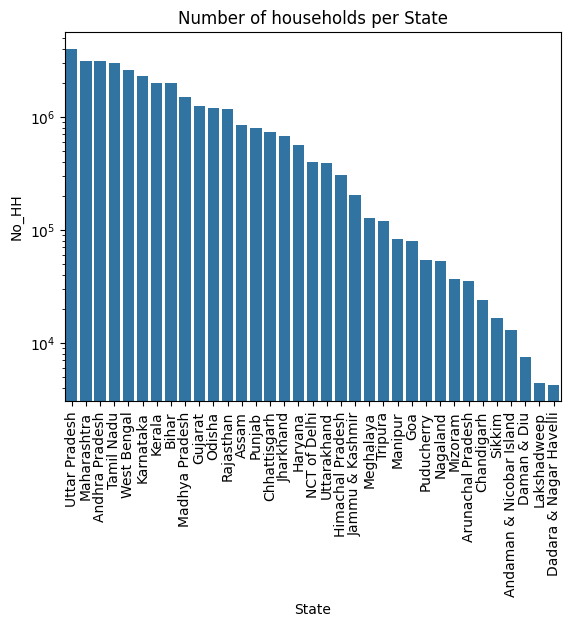

In [20]:
sns.barplot(x = 'State', y='No_HH', data = HH_per_state)
plt.title('Number of households per State')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [ ]:
TM_per_state= pd.DataFrame(pc.groupby(['State'])['TOT_M'].sum())
TM_per_state['State'] = TM_per_state.index
TM_per_state.reset_index(drop=True, inplace=True)
TM_per_state.sort_values('TOT_M', ascending=False, inplace=True)
TM_per_state.head()

TOT_M          State
32  9043969  Uttar Pradesh
19  4196130    Maharashtra
4   4025198          Bihar
34  3912553    West Bengal
15  3409482      Karnataka

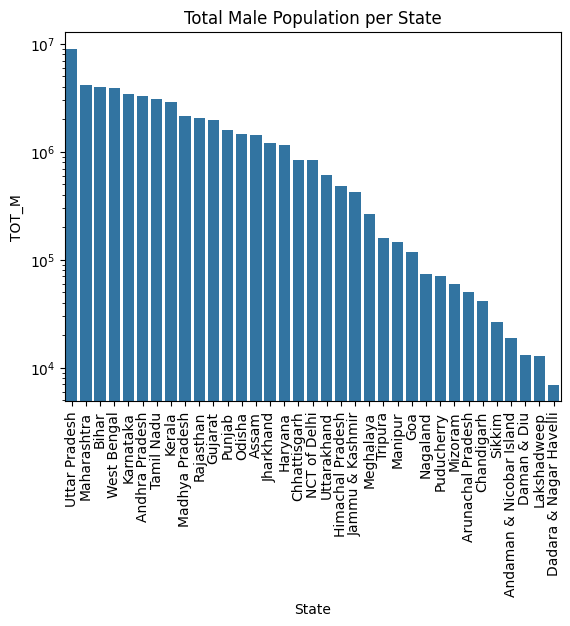

In [ ]:

sns.barplot(x = 'State', y='TOT_M', data = TM_per_state)
plt.title('Total Male Population per State')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [56]:
TF_per_state= pd.DataFrame(pc.groupby(['State'])['TOT_F'].sum())
TF_per_state['State'] = TF_per_state.index
TF_per_state.reset_index(drop=True, inplace=True)
TF_per_state.sort_values('TOT_F', ascending=False, inplace=True)
TF_per_state.head()

TOT_F           State
32  12023885   Uttar Pradesh
19   7138557     Maharashtra
1    6097235  Andhra Pradesh
34   6016118     West Bengal
30   5610310      Tamil Nadu

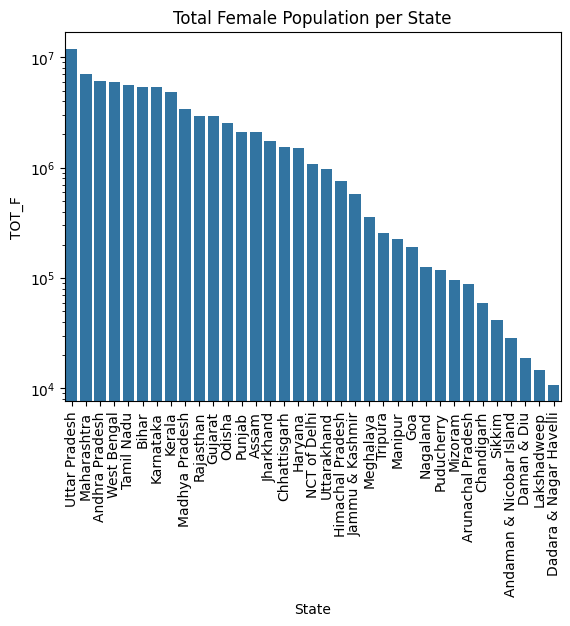

In [58]:
sns.barplot(x = 'State', y='TOT_F', data = TF_per_state)
plt.title('Total Female Population per State')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [59]:
M_06_per_state= pd.DataFrame(pc.groupby(['State'])['M_06'].sum())
M_06_per_state['State'] = M_06_per_state.index
M_06_per_state.reset_index(drop=True, inplace=True)
M_06_per_state.sort_values('M_06', ascending=False, inplace=True)
M_06_per_state.head()

M_06          State
32  1603472  Uttar Pradesh
4    819257          Bihar
19   574800    Maharashtra
34   485722    West Bengal
16   482732         Kerala

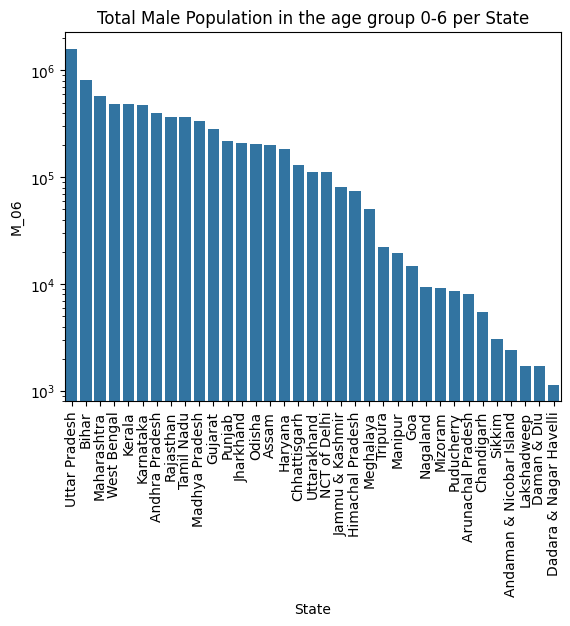

In [60]:
sns.barplot(x = 'State', y='M_06', data = M_06_per_state)
plt.title('Total Male Population in the age group 0-6 per State')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [61]:
F_06_per_state= pd.DataFrame(pc.groupby(['State'])['F_06'].sum())
F_06_per_state['State'] = F_06_per_state.index
F_06_per_state.reset_index(drop=True, inplace=True)
F_06_per_state.sort_values('F_06', ascending=False, inplace=True)
F_06_per_state.head()

F_06          State
32  1579630  Uttar Pradesh
4    817616          Bihar
19   572064    Maharashtra
34   482106    West Bengal
16   473723         Kerala

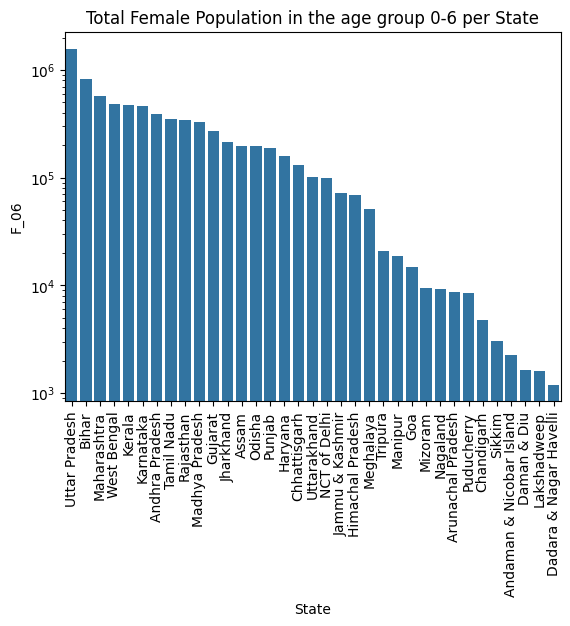

In [62]:
sns.barplot(x = 'State', y='F_06', data = F_06_per_state)
plt.title('Total Female Population in the age group 0-6 per State')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [21]:

pc['Total Male Population'] = pc['TOT_M'] + pc['M_06']
pc['Total Female Population'] = pc['TOT_F'] + pc['F_06']
pc['Gender Ratio'] = (pc['Total Male Population'] / pc['Total Female Population'])*100
pc.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0  5862  6196     3  ...            237            680            252   
1  4482  3733     7  ...            229            186            148   
2  1082  1018     3  ...             89              3             34   
3   563   677     0  ...            128             13             50   
4  5157  4587    20  ...           1043            205            302   

   MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  \
0             32             46         258         214   
1             76            178         140         160   
2              0              4          67          61   
3              4             10         116          59   
4             24            105         180         478   

   Total Male Population  Total Female Population  Gender Ratio  
0                  29250                    35992     81.268060  
1                  24067                    26835     89.685113  
2                   7628                    11982     63.662160  
3                   3347                     4883     68.543928  
4                  25748                    34568     74.485073  

[5 rows x 64 columns]

In [22]:
g_ratio = pd.DataFrame(pc.groupby(['State'])['Gender Ratio'].sum())
g_ratio['State'] = g_ratio.index
g_ratio.reset_index(drop=True, inplace=True)
g_ratio.sort_values('Gender Ratio', ascending=False, inplace=True)
g_ratio.head()


Gender Ratio           State
32   5623.783278   Uttar Pradesh
18   3357.934139  Madhya Pradesh
4    2960.260801           Bihar
28   2395.290235       Rajasthan
19   2124.936442     Maharashtra

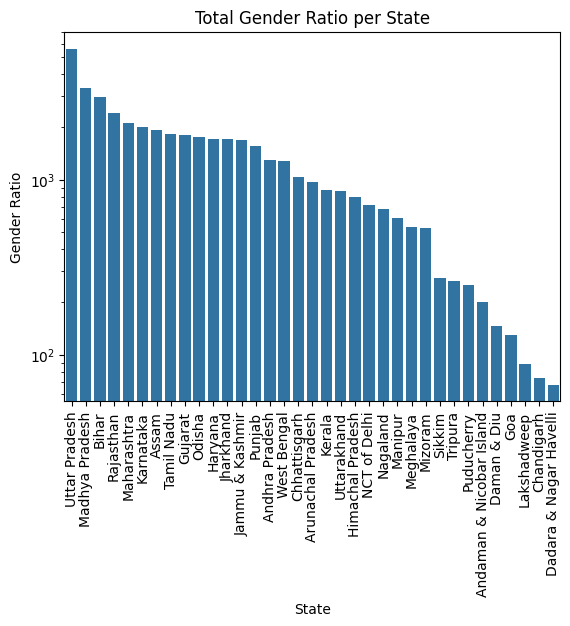

In [23]:
sns.barplot(x = 'State', y='Gender Ratio', data = g_ratio)
plt.title('Total Gender Ratio per State')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [28]:
d_g_ratio = pd.DataFrame(pc.groupby(['Dist.Code'])['Gender Ratio'].sum())
d_g_ratio['Dist.Code'] = d_g_ratio.index
d_g_ratio.reset_index(drop=True, inplace=True)
d_g_ratio.sort_values('Gender Ratio', ascending=False, inplace=True)
d_g_ratio.head()

Gender Ratio  Dist.Code
1       89.685113          2
586     88.892964        587
105     87.658094        106
138     87.640526        139
143     87.530467        144

district that has the highest gender ratio

In [29]:
pc[pc['Dist.Code']==2]

State Code  Dist.Code            State Area Name  No_HH  TOT_M  TOT_F  \
1           1          2  Jammu & Kashmir    Badgam   6218  19585  23102   

   M_06  F_06  M_SC  ...  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
1  4482  3733     7  ...            229            186            148   

   MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  \
1             76            178         140         160   

   Total Male Population  Total Female Population  Gender Ratio  
1                  24067                    26835     89.685113  

[1 rows x 64 columns]

In [30]:
d_g_ratio.tail()

Gender Ratio  Dist.Code
397     47.793071        398
609     47.652139        610
624     47.643949        625
545     47.570801        546
546     46.311555        547

district that has the lowest gender ratio

In [31]:
pc[pc['Dist.Code']==547]

State Code  Dist.Code           State Area Name   No_HH   TOT_M   TOT_F  \
546          28        547  Andhra Pradesh   Krishna  182404  137603  314182   

      M_06   F_06   M_SC  ...  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
546  14373  13978  31646  ...             80            518           2961   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  \
546             52            189         462        1266   

     Total Male Population  Total Female Population  Gender Ratio  
546                 151976                   328160     46.311555  

[1 rows x 64 columns]

Check for and treat (if needed) missing values

In [32]:
pc.isnull().sum()

State Code                 0
Dist.Code                  0
State                      0
Area Name                  0
No_HH                      0
                          ..
NON_WORK_M                 0
NON_WORK_F                 0
Total Male Population      0
Total Female Population    0
Gender Ratio               0
Length: 64, dtype: int64

In [33]:
# no null values detected.

**Scaling the data**

In [38]:
pc_num = pc.iloc[:, 4:61]
pc_num.head(2)

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  M_LIT  ...  \
0   7707  23388  29796  5862  6196     3     0  1999  2598  13381  ...   
1   6218  19585  23102  4482  3733     7     6   427   517  10513  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           1150            749            180            237            680   
1            525            715            123            229            186   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0            252             32             46         258         214  
1            148             76            178         140         160  

[2 rows x 57 columns]

Visualizing data before Scaling

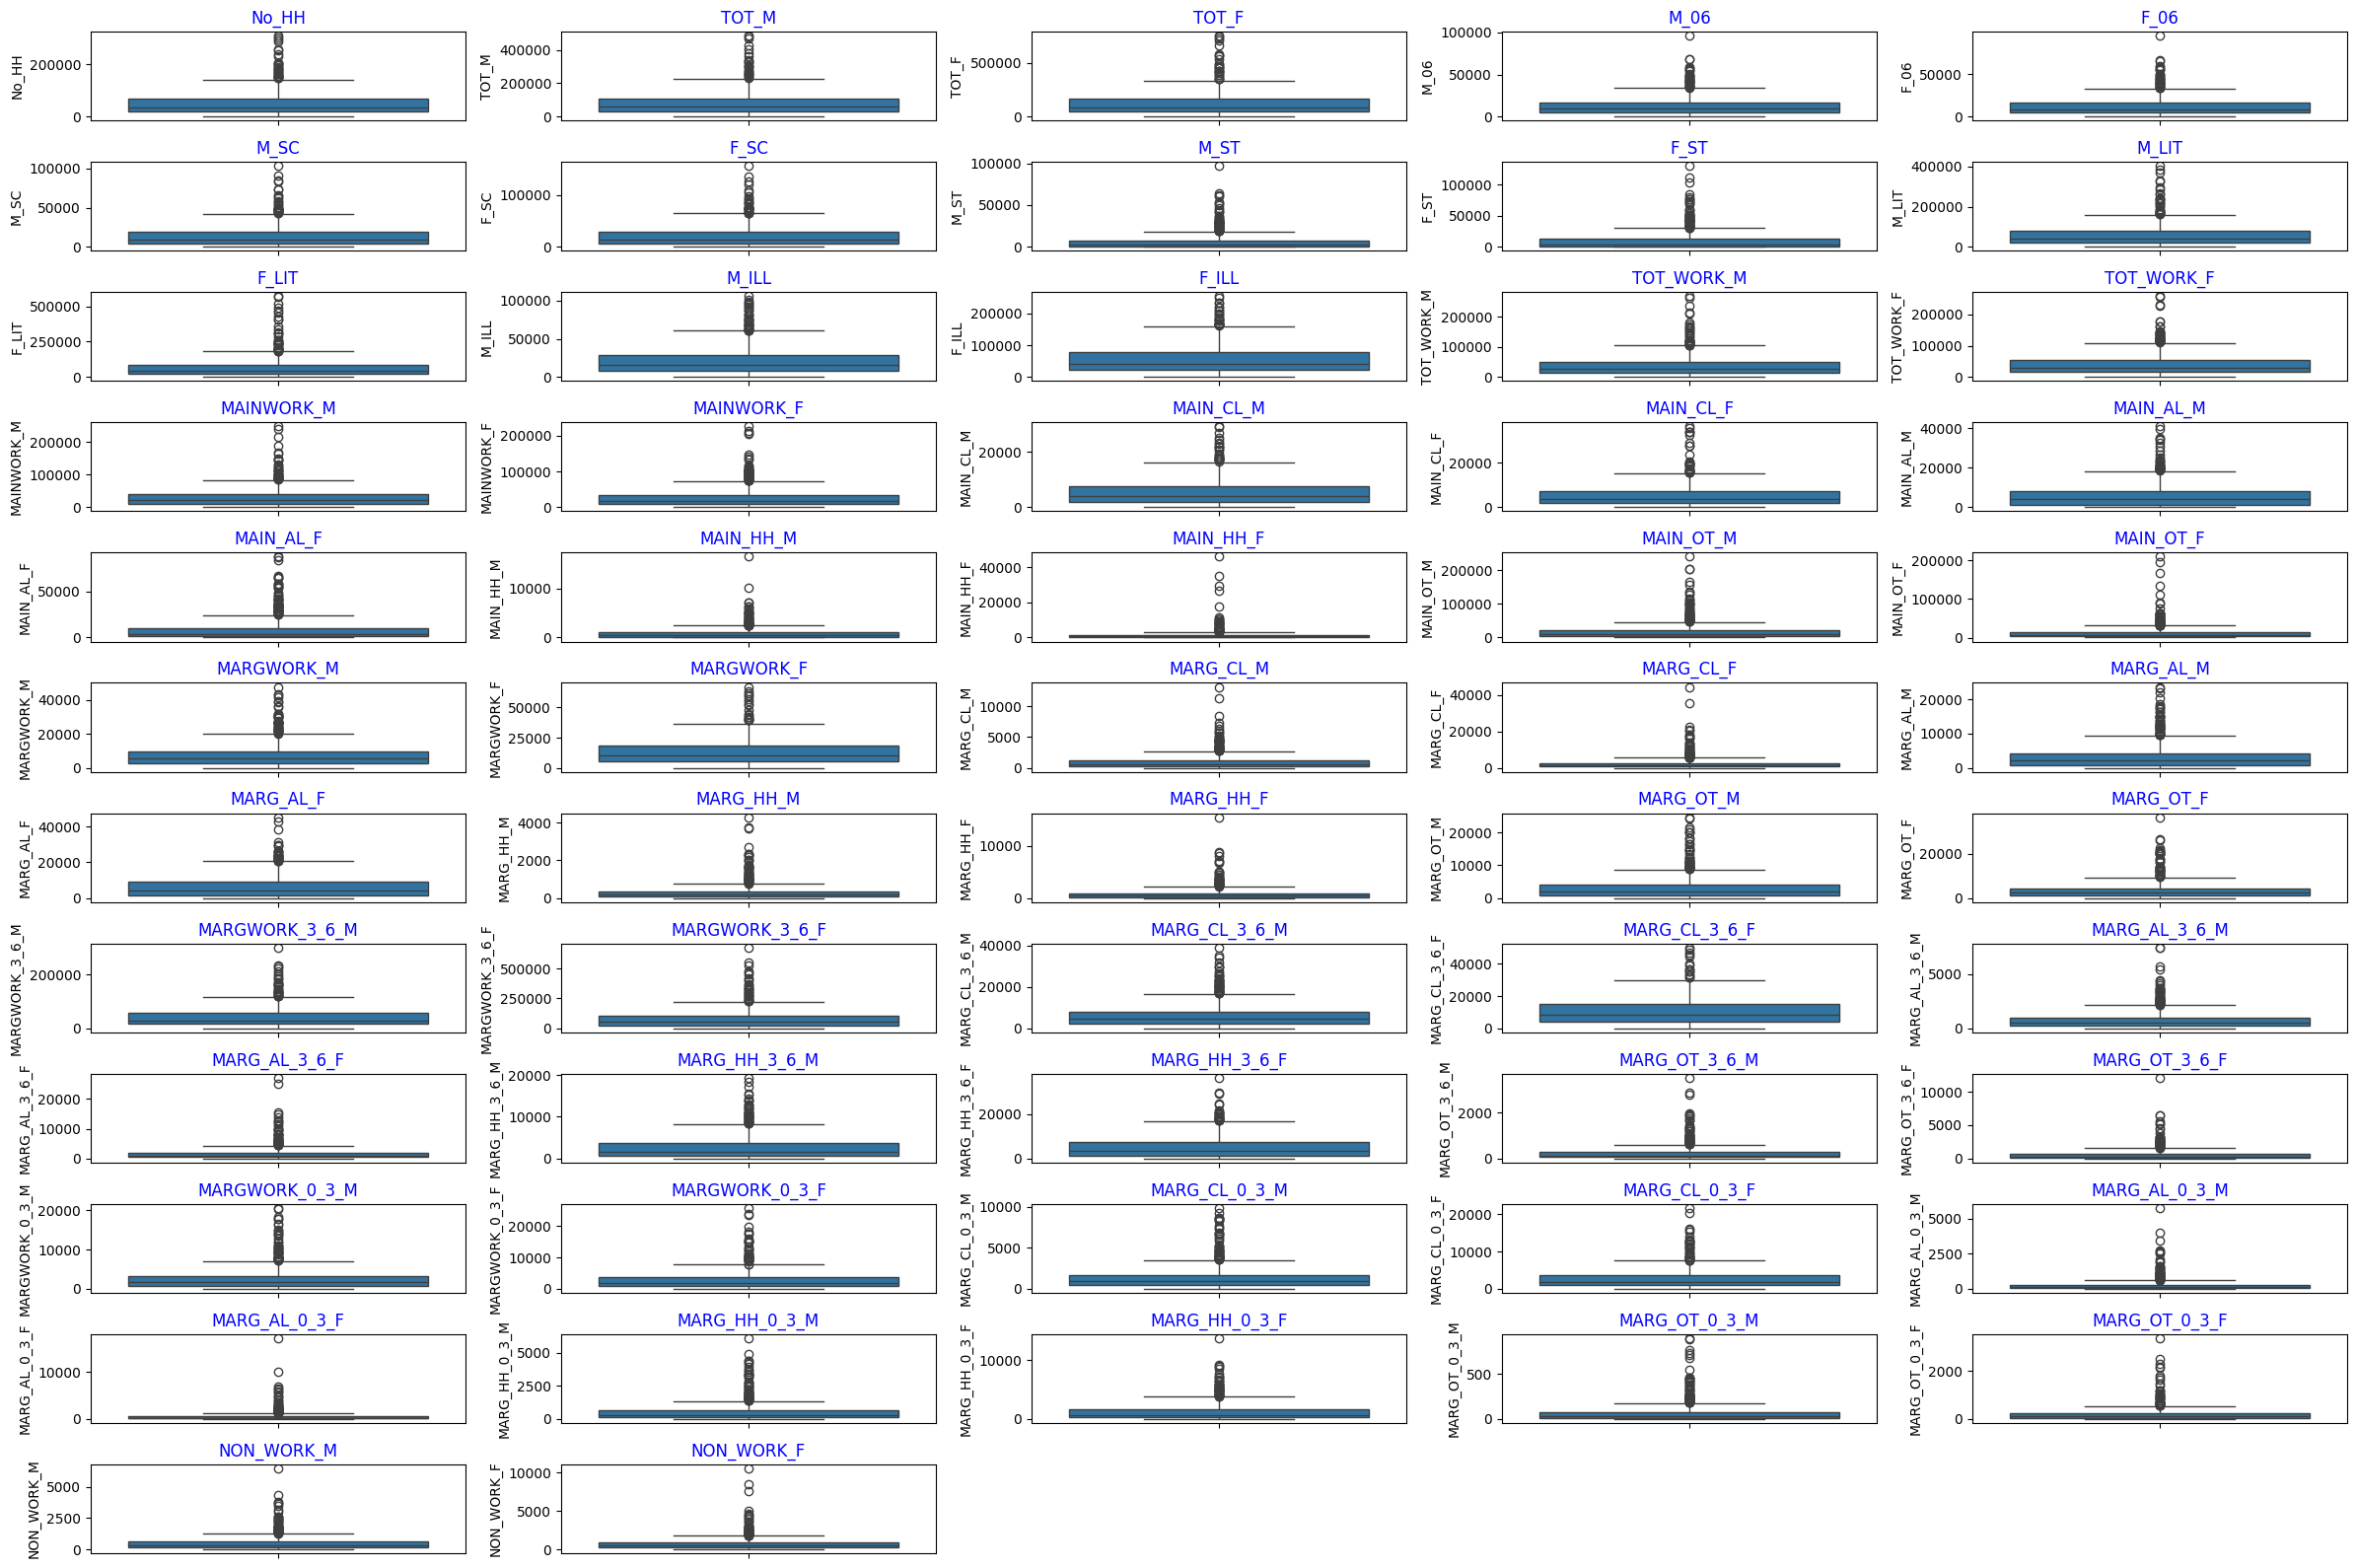

In [41]:
fig = plt.figure(figsize=(24,16))
for i in range(0, len(pc_num.columns)):
    ax= fig.add_subplot(12,5,i+1)
    sns.boxplot(pc_num[pc_num.columns[i]])
    ax.set_title(pc_num.columns[i], color='Blue')
    plt.tight_layout();

**Scaling**

In [47]:
from scipy.stats import zscore

In [51]:
scale = pc_num.apply(zscore)
scale

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1   -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2   -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3   -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4   -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   
..        ...       ...       ...       ...       ...       ...       ...   
635 -0.995677 -0.978990 -0.974268 -0.971387 -0.948916 -0.957326 -0.955667   
636 -0.844340 -0.921822 -0.886965 -0.936754 -0.919757 -0.803806 -0.765670   
637 -1.038465 -1.069066 -1.054885 -1.051356 -1.035331 -0.958783 -0.957049   
638 -0.986758 -1.019276 -1.007472 -1.008195 -0.996541 -0.958783 -0.957049   
639 -0.899166 -0.926854 -0.919050 -0.943193 -0.935220 -0.958783 -0.957049   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0   -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1   -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2   -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3   -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4    0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   
..        ...       ...       ...  ...            ...            ...   
635 -0.625124 -0.640197 -0.913820  ...      -0.914299      -0.972530   
636 -0.625124 -0.640197 -0.853390  ...      -0.831668      -0.868461   
637 -0.522953 -0.529880 -1.016367  ...      -0.865930      -0.941309   
638 -0.622297 -0.637046 -0.962328  ...      -0.844432      -0.927673   
639 -0.608870 -0.623555 -0.856916  ...      -0.819576      -0.945616   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0        -0.156494      -0.287524       0.156577      -0.657412   
1        -0.282327      -0.294688      -0.491731      -0.723062   
2        -0.456727      -0.420050      -0.731894      -0.795026   
3        -0.419198      -0.385127      -0.718770      -0.784926   
4         0.472670       0.434200      -0.466796      -0.625849   
..             ...            ...            ...            ...   
635      -0.553861      -0.499744      -0.735831      -0.816489   
636      -0.547238      -0.487208      -0.685961      -0.734425   
637      -0.533992      -0.496162      -0.733206      -0.812701   
638      -0.500878      -0.460344      -0.721395      -0.803232   
639      -0.540615      -0.497953      -0.713521      -0.805757   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        -0.365258      -0.499977   -0.413053   -0.539614  
1         0.042855      -0.073481   -0.606455   -0.598988  
2        -0.662068      -0.635680   -0.726103   -0.707839  
3        -0.624966      -0.616294   -0.645791   -0.710038  
4        -0.439461      -0.309346   -0.540895   -0.249344  
..             ...            ...         ...         ...  
635      -0.662068      -0.648604   -0.783468   -0.723232  
636      -0.624966      -0.574290   -0.655625   -0.587993  
637      -0.504388      -0.496746   -0.711352   -0.690247  
638      -0.652792      -0.635680   -0.672015   -0.661660  
639      -0.643517      -0.635680   -0.593343   -0.666058  

[640 rows x 57 columns]

Visualizing data after Scaling

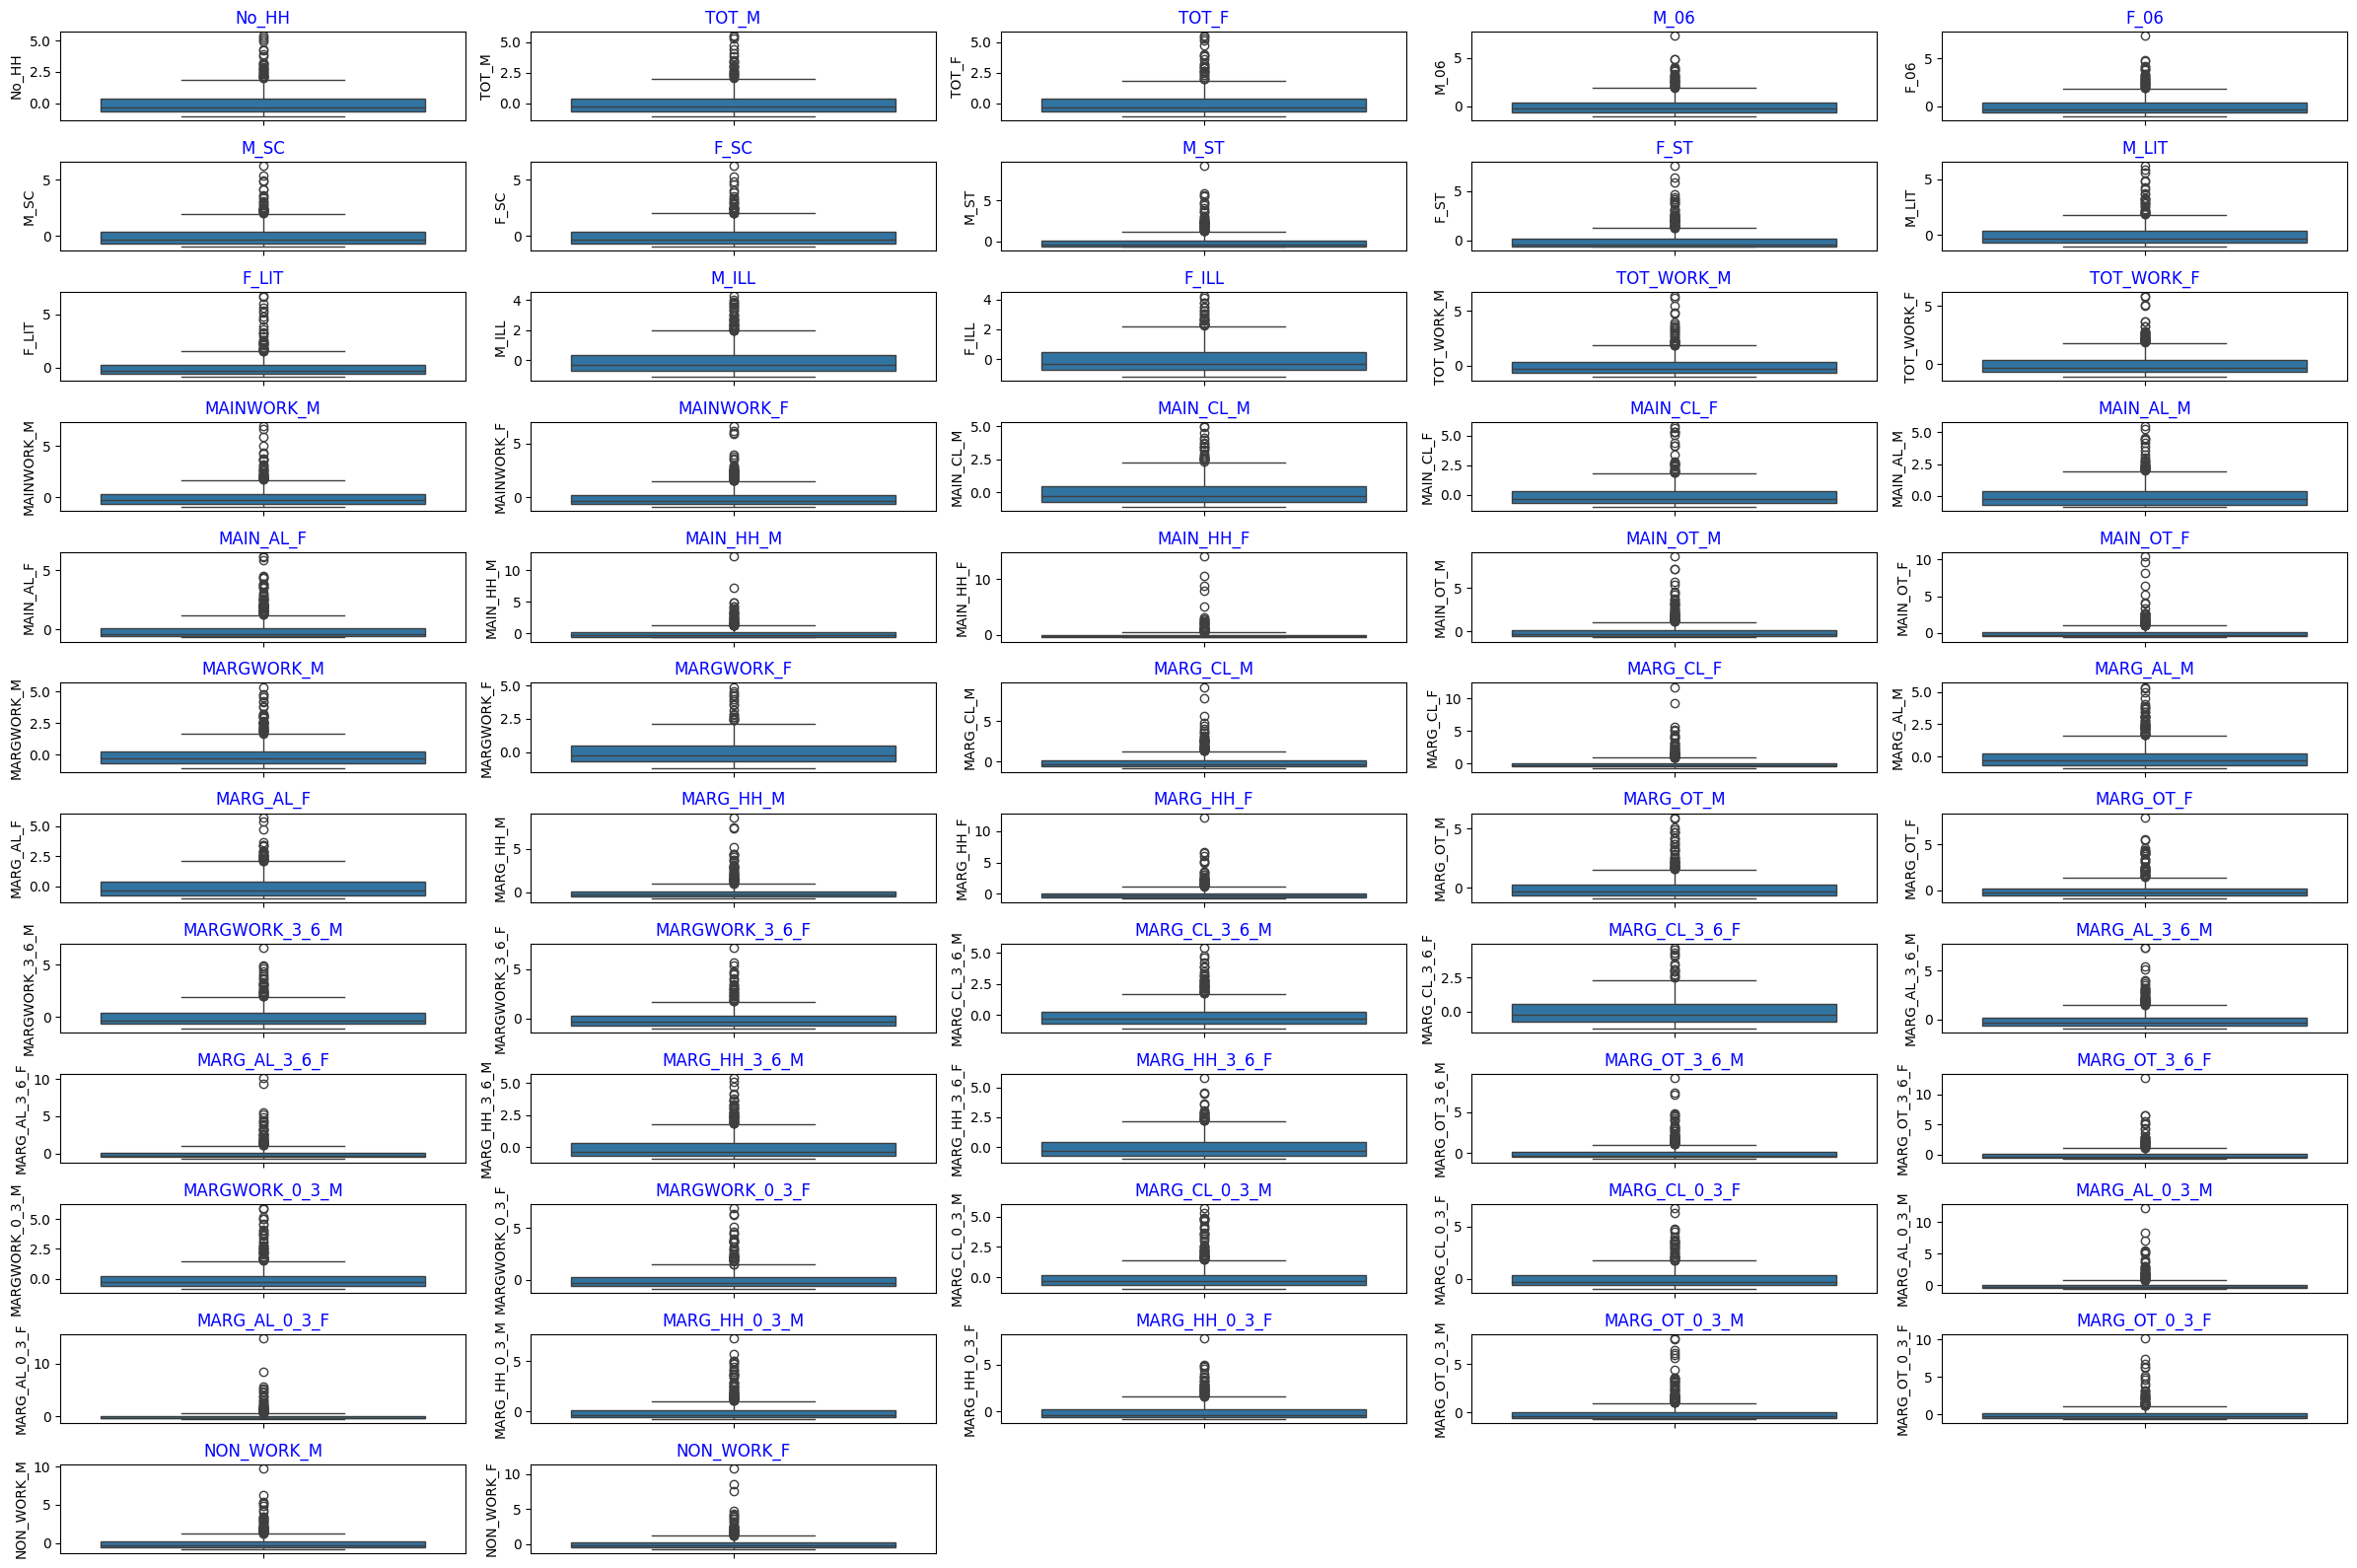

In [50]:
fig = plt.figure(figsize=(24,16))
for i in range(0, len(scale.columns)):
    ax= fig.add_subplot(12,5,i+1)
    sns.boxplot(scale[scale.columns[i]])
    ax.set_title(scale.columns[i], color='Blue')
    plt.tight_layout();

Creating Covariance Matrix

In [52]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scale)
p_value

0.0

In [53]:
# So, there are significant correlations among variables

In [54]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scale)
kmo_model

0.8039889932781807

In [56]:
# adequacy of sample size is acceptable.

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(scale)

In [71]:
covariance_matrix_pc = np.cov(pca_transformed, rowvar=False)
covariance_matrix_pc

array([[ 3.18135647e+01,  0.00000000e+00,  3.55827348e-16,
        -1.06748204e-15, -6.67176278e-16, -5.33741022e-16,
        -8.89568370e-17,  0.00000000e+00, -8.89568370e-17,
         1.77913674e-16,  2.38376524e-16, -8.89568370e-17],
       [ 0.00000000e+00,  7.86942415e+00,  1.33435256e-15,
        -5.33741022e-16,  1.55674465e-16,  1.77913674e-16,
         8.89568370e-17, -8.89568370e-17,  1.11196046e-16,
        -2.22392093e-17, -3.03356714e-16, -1.11196046e-16],
       [ 3.55827348e-16,  1.33435256e-15,  4.15340812e+00,
         3.20244613e-15, -5.33741022e-16, -5.78219441e-16,
        -3.89186162e-16, -4.44784185e-17, -4.44784185e-17,
         1.33435256e-16,  1.33435256e-16,  2.77990116e-17],
       [-1.06748204e-15, -5.33741022e-16,  3.20244613e-15,
         3.66879058e+00,  4.89262604e-16, -4.89262604e-16,
         1.55674465e-16,  2.22392093e-17,  0.00000000e+00,
        -2.77990116e-17, -1.77913674e-16,  1.33435256e-16],
       [-6.67176278e-16,  1.55674465e-16, -5.3374102

In [61]:
# eigen vectors:
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [62]:
# eigen values:
pca.explained_variance_

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502,  1.17617374,  0.75115909,  0.61705374,  0.52830089,
        0.42983119,  0.3534402 ])

In [74]:
# explained variance
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169, 0.02060239, 0.01315764, 0.01080859, 0.00925395,
       0.00752912, 0.00619102])

In [75]:
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = scale.columns)

In [76]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083   
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389   
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647   
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957   
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436   
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007 -0.064295   
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803 -0.040518   
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163  0.222591   
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792  0.225531   
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101 -0.055465   
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844 -0.048021   
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580 -0.115234   
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119910 -0.028757   
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553 -0.001801   
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437  0.105162   
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802  0.019283   
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834  0.123832   
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039 -0.006170   
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936  0.102951   
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724 -0.031068   
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605  0.019240   
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089  0.174465   
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441  0.422309   
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638  0.023477   
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743  0.083079   
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244 -0.090761   
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202  0.017868   
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263  0.031915   
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205  0.092086   
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422 -0.141605   
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527 -0.085120   
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971  0.089533   
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602  0.365112   
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121 -0.061066   
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882  0.001739   
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834 -0.136253   
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537 -0.106900   
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073 -0.096708   
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050  0.023773   
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789  0.013477   
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303  0.093993   
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457 -0.144061   
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109 -0.076708   
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400  0.097057   
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810  0.384552   
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829 -0.062043   
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190  0.008962   
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185 -0.060715   
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936 -0.001727   
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849  0.065409   
MARG_AL_0_3_F   0.041786  0.240720  0.28495

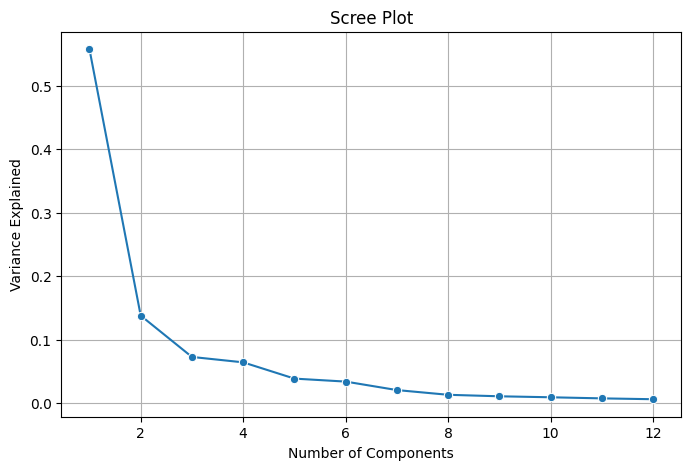

In [77]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [78]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701])

In [81]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
df_selected.head()

PC1       PC2       PC3       PC4       PC5       PC6
No_HH  0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083
TOT_M  0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389
TOT_F  0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647
M_06   0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957
F_06   0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436

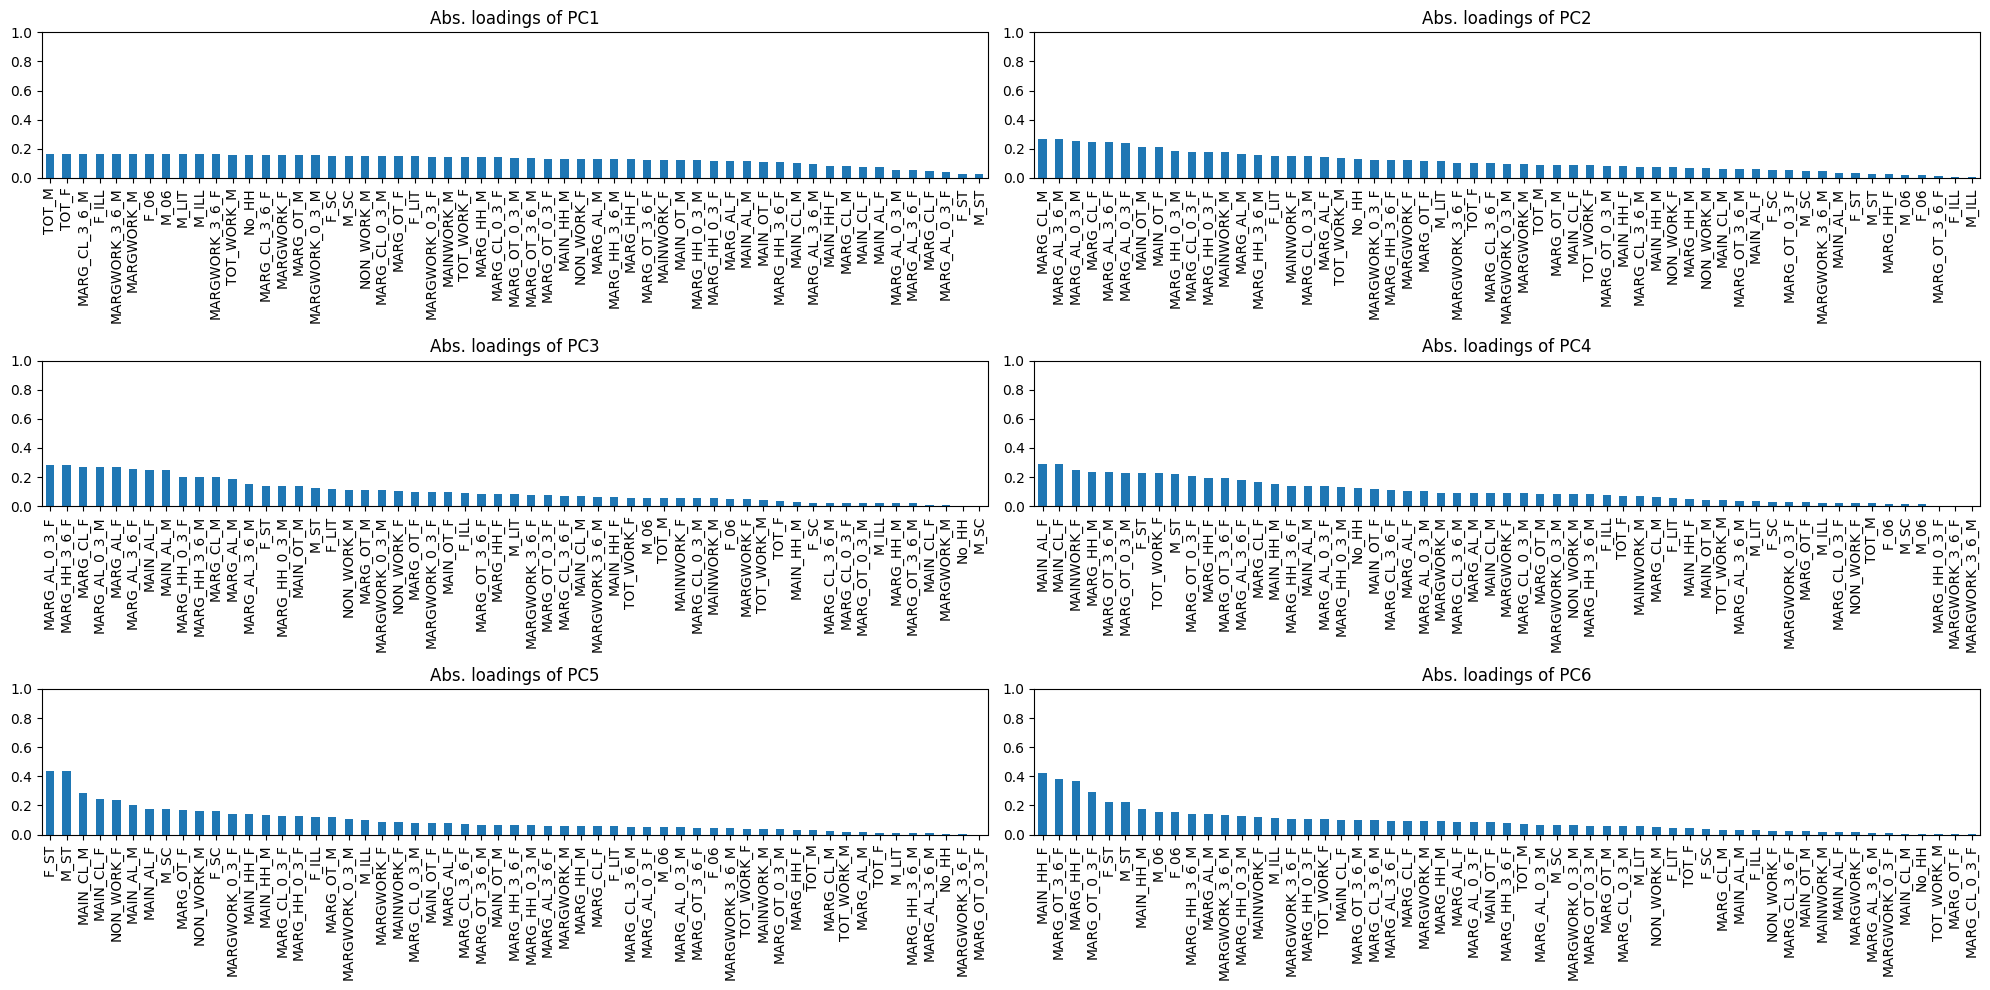

In [83]:
plt.figure(figsize = (20,10))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

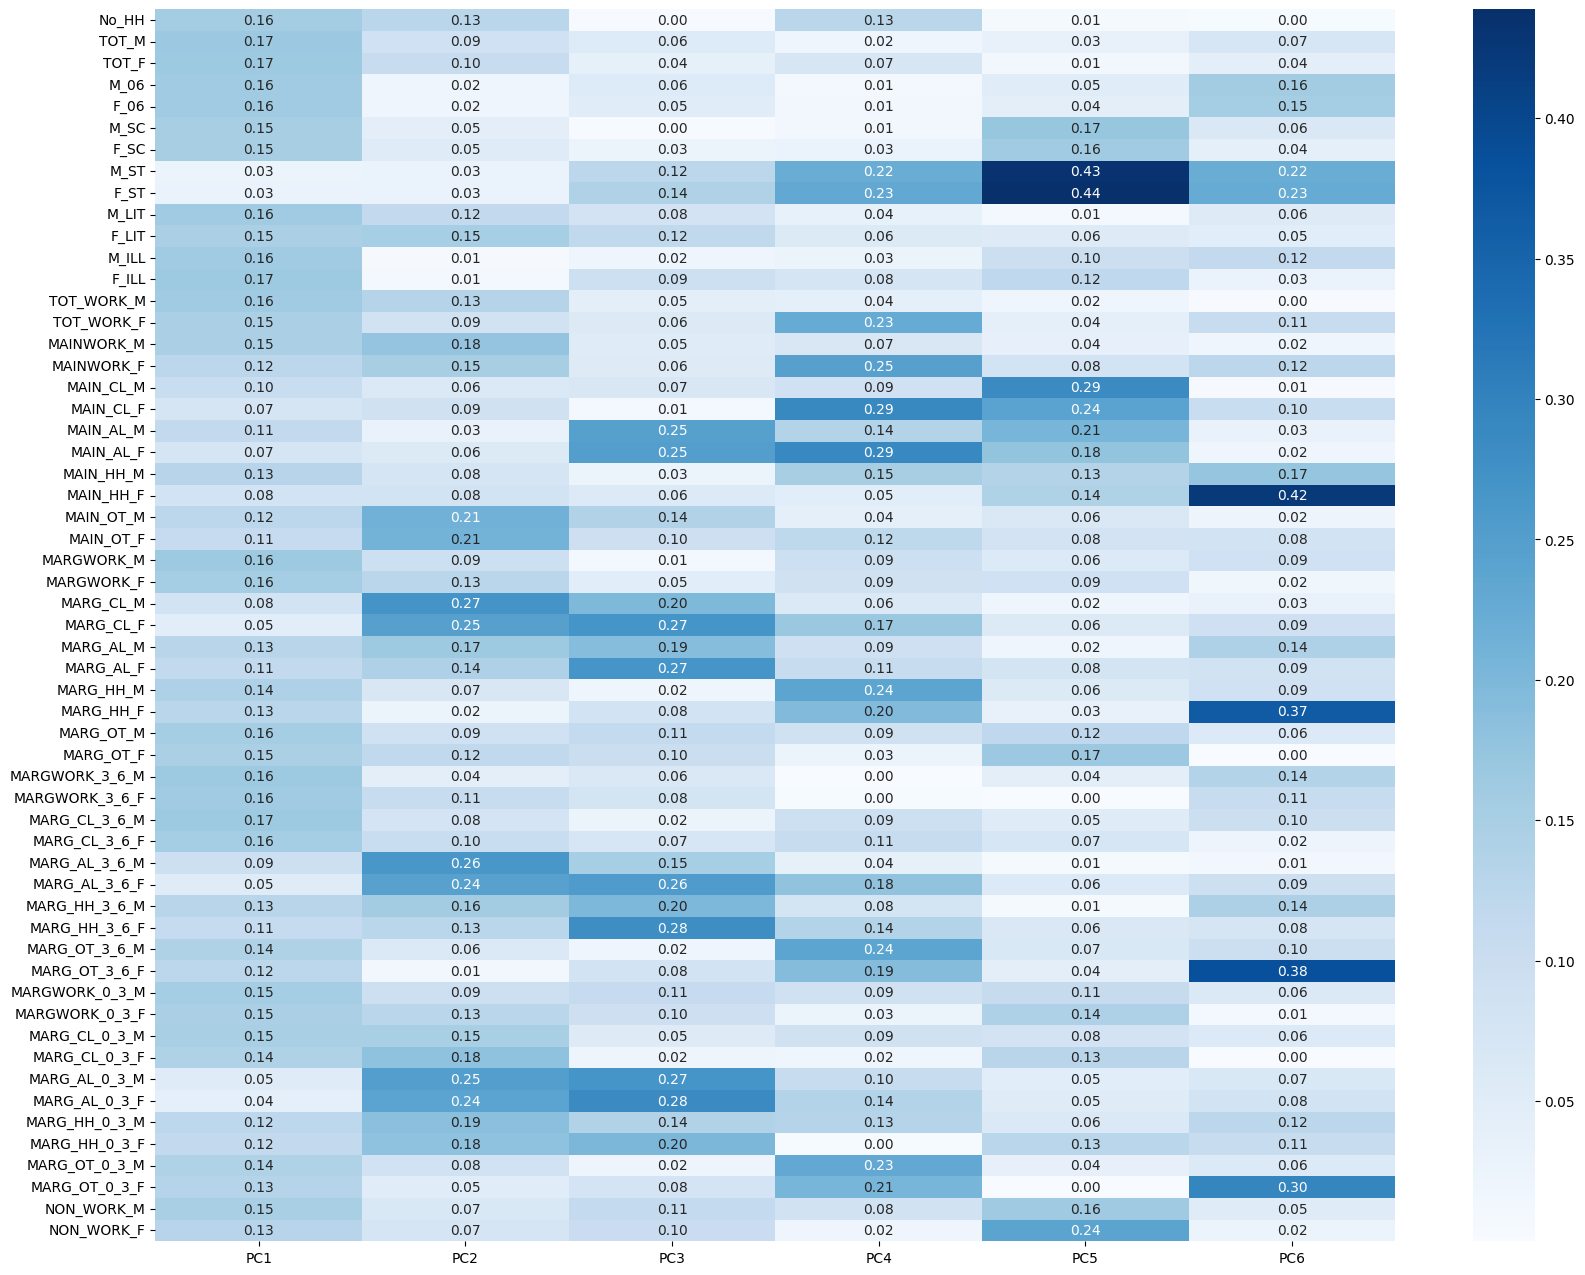

In [85]:
plt.figure(figsize = (20,16))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [86]:
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(scale)

In [87]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6
0 -4.617263  0.138116  0.328545  1.543697  0.353736 -0.420948
1 -4.771662 -0.105865  0.244449  1.963215 -0.153884  0.417308
2 -5.964836 -0.294347  0.367394  0.619543  0.478199  0.276581
3 -6.280796 -0.500384  0.212701  1.074515  0.300799  0.051157
4 -4.478566  0.894154  1.078277  0.535557  0.804065  0.341678
5 -3.319963  2.823865  3.058460 -0.447904  0.742445  0.634676
6 -5.021393 -0.346359  0.650378  0.981072 -0.059778 -0.246957
7 -4.608709  0.022370  0.398755  1.576995  0.171316 -0.139444
8 -5.186703 -0.059097  0.184397  1.735440  0.169174  0.455039
9 -4.226190 -1.335080  0.697838  1.470509  0.269146 -0.002576

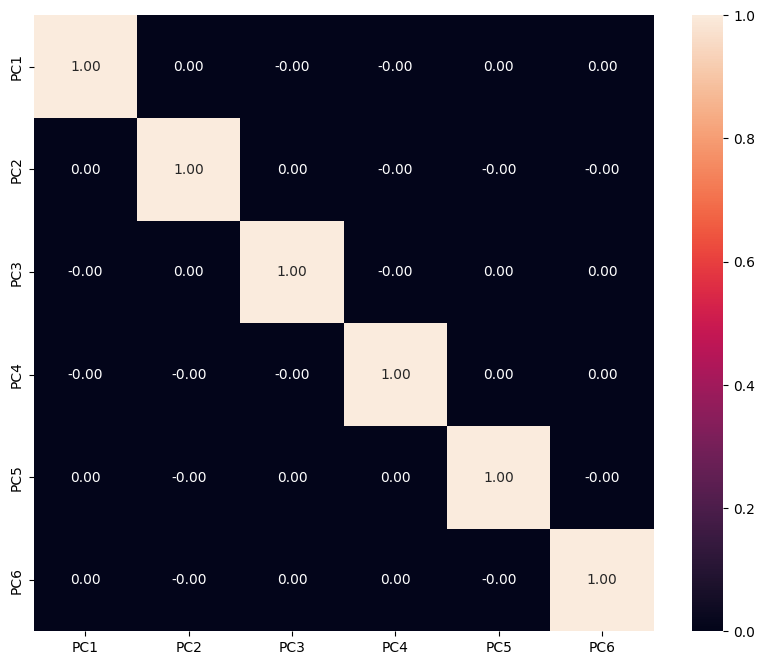

In [88]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');